# Exploratory Data Analysis

1. Exploratory Data Analysis:
   1) Null values analysis;
   2) Descriptive statistics on devices, study day and numeric variables;
   3) Start and end dates exploration.
   
2. Data Quality Evaluation: 
   The analysis is conducted among dogs with and without the desired health state.

3. Anomaly detection and outlier analysis based on:
   1) Excessive running;
   2) Stuck accel;
   3) Consecutive running as no consecutive running within the extract.

In [141]:
import pandas as pd
from matplotlib.pylab import plt
import numpy as np
pd.set_option('display.max_rows', 700)
pd.set_option('display.max_columns', 700)
import seaborn as sns
import sklearn
from sklearn.ensemble import IsolationForest
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
from datetime import datetime

# Input Dataset

## AGING_DATA_EXTRACT__NEW_NQSD_20231214.csv

In [142]:
data_nopop = pd.read_csv("gs://hpn_cte_advanced_stats_data_repository/yahui_data_repository/Aging 202312/AGING_DATA_EXTRACT__NEW_NQSD_20231214.csv")
population = pd.read_csv("gs://hpn_cte_advanced_stats_data_repository/yahui_data_repository/Aging 202312/population_updates_20231214.csv")

/opt/conda/envs/hillsadvancedml_envi/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3258: DtypeWarning: Columns (640,642,646,653) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [143]:
data['EXCESSIVE_RUNNING'].unique()

array([0, 1])

In [144]:
data['CONSECUTIVE_RUNNING'].unique()

array([0])

In [3]:
data_nopop.head()

,PET_ID,EXTERNAL_ID,DEVICE_ID,STUDY_ID,STUDY_NAME,PET_NAME,DATE,NORMALIZED_STUDY_DAY,NORMALIZED_QUALIFYING_STUDY_DAY,STUDY_DAY_COUNTER,STUDY_GROUP,BASELINE_START,START_DATE,ENROLLMENT_DATE,COMPLETION_DATE,END_DATE,EXCESSIVE_RUNNING,TIMEZONE,QUALIFYING_DATA_DAY,IS_QUALIFIED,DAILYDATAQUALITYINDREASON,VAR_TD_1_Q1_2,VAR_CE_1_Q1_2,VAR_MIN_1_Q1_2,VAR_MED_1_Q1_2,VAR_RANG_1_Q1_2,VAR_MAX_1_Q1_2,VAR_AVG_1_Q1_2,VAR_SD_1_Q1_2,VAR_IQR_1_Q1_2,VAR_ACE_1_Q1_2,VAR_SDCE_1_Q1_2,VAR_IQRCE_1_Q1_2,VAR_CE3SD_1_Q1_2,VAR_TD_3_Q1_2,VAR_CE_3_Q1_2,VAR_MIN_3_Q1_2,VAR_MED_3_Q1_2,VAR_RANG_3_Q1_2,VAR_MAX_3_Q1_2,VAR_AVG_3_Q1_2,VAR_SD_3_Q1_2,VAR_IQR_3_Q1_2,VAR_ACE_3_Q1_2,VAR_SDCE_3_Q1_2,VAR_IQRCE_3_Q1_2,VAR_CE3SD_3_Q1_2,VAR_TD_5_Q1_2,VAR_CE_5_Q1_2,VAR_MIN_5_Q1_2,VAR_MED_5_Q1_2,VAR_RANG_5_Q1_2,VAR_MAX_5_Q1_2,VAR_AVG_5_Q1_2,VAR_SD_5_Q1_2,VAR_IQR_5_Q1_2,VAR_ACE_5_Q1_2,VAR_SDCE_5_Q1_2,VAR_IQRCE_5_Q1_2,VAR_CE3SD_5_Q1_2,VAR_TD_4_Q1_2,VAR_CE_4_Q1_2,VAR_MIN_4_Q1_2,VAR_MED_4_Q1_2,VAR_RANG_4_Q1_2,VAR_MAX_4_Q1_2,VAR_AVG_4_Q1_2,VAR_SD_4_Q1_2,VAR_IQR_4_Q1_2,VAR_ACE_4_Q1_2,VAR_SDCE_4_Q1_2,VAR_IQRCE_4_Q1_2,VAR_CE3SD_4_Q1_2,VAR_TD_12_Q1_2,VAR_CE_12_Q1_2,VAR_MIN_12_Q1_2,VAR_MED_12_Q1_2,VAR_RANG_12_Q1_2,VAR_MAX_12_Q1_2,VAR_AVG_12_Q1_2,VAR_SD_12_Q1_2,VAR_IQR_12_Q1_2,VAR_ACE_12_Q1_2,VAR_SDCE_12_Q1_2,VAR_IQRCE_12_Q1_2,VAR_CE3SD_12_Q1_2,VAR_TD_2_Q1_2,VAR_CE_2_Q1_2,VAR_MIN_2_Q1_2,VAR_MED_2_Q1_2,VAR_RANG_2_Q1_2,VAR_MAX_2_Q1_2,VAR_AVG_2_Q1_2,VAR_SD_2_Q1_2,VAR_IQR_2_Q1_2,VAR_ACE_2_Q1_2,VAR_SDCE_2_Q1_2,VAR_IQRCE_2_Q1_2,VAR_CE3SD_2_Q1_2,VAR_TD_46_Q1_2,VAR_CE_46_Q1_2,VAR_MIN_46_Q1_2,VAR_MED_46_Q1_2,VAR_RANG_46_Q1_2,VAR_MAX_46_Q1_2,VAR_AVG_46_Q1_2,VAR_SD_46_Q1_2,VAR_IQR_46_Q1_2,VAR_ACE_46_Q1_2,VAR_SDCE_46_Q1_2,VAR_IQRCE_46_Q1_2,VAR_CE3SD_46_Q1_2,VAR_TD_45_Q1_2,VAR_CE_45_Q1_2,VAR_MIN_45_Q1_2,VAR_MED_45_Q1_2,VAR_RANG_45_Q1_2,VAR_MAX_45_Q1_2,VAR_AVG_45_Q1_2,VAR_SD_45_Q1_2,VAR_IQR_45_Q1_2,VAR_ACE_45_Q1_2,VAR_SDCE_45_Q1_2,VAR_IQRCE_45_Q1_2,VAR_IDX_11_Q1_2,VAR_CE3SD_45_Q1_2,VAR_TD_1_Q2_2,VAR_CE_1_Q2_2,VAR_MIN_1_Q2_2,VAR_MED_1_Q2_2,VAR_RANG_1_Q2_2,VAR_MAX_1_Q2_2,VAR_AVG_1_Q2_2,VAR_SD_1_Q2_2,VAR_IQR_1_Q2_2,VAR_ACE_1_Q2_2,VAR_SDCE_1_Q2_2,VAR_IQRCE_1_Q2_2,VAR_CE3SD_1_Q2_2,VAR_TD_3_Q2_2,VAR_CE_3_Q2_2,VAR_MIN_3_Q2_2,VAR_MED_3_Q2_2,VAR_RANG_3_Q2_2,VAR_MAX_3_Q2_2,VAR_AVG_3_Q2_2,VAR_SD_3_Q2_2,VAR_IQR_3_Q2_2,VAR_ACE_3_Q2_2,VAR_SDCE_3_Q2_2,VAR_IQRCE_3_Q2_2,VAR_CE3SD_3_Q2_2,VAR_TD_5_Q2_2,VAR_CE_5_Q2_2,VAR_MIN_5_Q2_2,VAR_MED_5_Q2_2,VAR_RANG_5_Q2_2,VAR_MAX_5_Q2_2,VAR_AVG_5_Q2_2,VAR_SD_5_Q2_2,VAR_IQR_5_Q2_2,VAR_ACE_5_Q2_2,VAR_SDCE_5_Q2_2,VAR_IQRCE_5_Q2_2,VAR_CE3SD_5_Q2_2,VAR_TD_4_Q2_2,VAR_CE_4_Q2_2,VAR_MIN_4_Q2_2,VAR_MED_4_Q2_2,VAR_RANG_4_Q2_2,VAR_MAX_4_Q2_2,VAR_AVG_4_Q2_2,VAR_SD_4_Q2_2,VAR_IQR_4_Q2_2,VAR_ACE_4_Q2_2,VAR_SDCE_4_Q2_2,VAR_IQRCE_4_Q2_2,VAR_CE3SD_4_Q2_2,VAR_TD_12_Q2_2,VAR_CE_12_Q2_2,VAR_MIN_12_Q2_2,VAR_MED_12_Q2_2,VAR_RANG_12_Q2_2,VAR_MAX_12_Q2_2,VAR_AVG_12_Q2_2,VAR_SD_12_Q2_2,VAR_IQR_12_Q2_2,VAR_ACE_12_Q2_2,VAR_SDCE_12_Q2_2,VAR_IQRCE_12_Q2_2,VAR_CE3SD_12_Q2_2,VAR_TD_2_Q2_2,VAR_CE_2_Q2_2,VAR_MIN_2_Q2_2,VAR_MED_2_Q2_2,VAR_RANG_2_Q2_2,VAR_MAX_2_Q2_2,VAR_AVG_2_Q2_2,VAR_SD_2_Q2_2,VAR_IQR_2_Q2_2,VAR_ACE_2_Q2_2,VAR_SDCE_2_Q2_2,VAR_IQRCE_2_Q2_2,VAR_CE3SD_2_Q2_2,VAR_TD_46_Q2_2,VAR_CE_46_Q2_2,VAR_MIN_46_Q2_2,VAR_MED_46_Q2_2,VAR_RANG_46_Q2_2,VAR_MAX_46_Q2_2,VAR_AVG_46_Q2_2,VAR_SD_46_Q2_2,VAR_IQR_46_Q2_2,VAR_ACE_46_Q2_2,VAR_SDCE_46_Q2_2,VAR_IQRCE_46_Q2_2,VAR_CE3SD_46_Q2_2,VAR_TD_45_Q2_2,VAR_CE_45_Q2_2,VAR_MIN_45_Q2_2,VAR_MED_45_Q2_2,VAR_RANG_45_Q2_2,VAR_MAX_45_Q2_2,VAR_AVG_45_Q2_2,VAR_SD_45_Q2_2,VAR_IQR_45_Q2_2,VAR_ACE_45_Q2_2,VAR_SDCE_45_Q2_2,VAR_IQRCE_45_Q2_2,VAR_IDX_11_Q2_2,VAR_CE3SD_45_Q2_2,VAR_TD_1_Q3_2,VAR_CE_1_Q3_2,VAR_MIN_1_Q3_2,VAR_MED_1_Q3_2,VAR_RANG_1_Q3_2,VAR_MAX_1_Q3_2,VAR_AVG_1_Q3_2,VAR_SD_1_Q3_2,VAR_IQR_1_Q3_2,VAR_ACE_1_Q3_2,VAR_SDCE_1_Q3_2,VAR_IQRCE_1_Q3_2,VAR_CE3SD_1_Q3_2,VAR_TD_3_Q3_2,VAR_CE_3_Q3_2,VAR_MIN_3_Q3_2,VAR_MED_3_Q3_2,VAR_RANG_3_Q3_2,VAR_MAX_3_Q3_2,VAR_AVG_3_Q3_2,VAR_SD_3_Q3_2,VAR_IQR_3_Q3_2,VAR_ACE_3_Q3_2,VAR_SDCE_3_Q3_2,VAR_IQRCE_3_Q3_2,VAR_CE3SD_3_Q3_2,VAR_TD_5_Q3_2,VAR_CE_5_Q3_

In [4]:
data_nopop['NORMALIZED_QUALIFYING_STUDY_DAY_NEW'].dtype

dtype('float64')

In [5]:
population.head()

,PET_ID,wearables_itt,wearables_pp,wearables_itt_extract,wearables_pp_extract,itt_failure_reason,pp_failure_reason
0,3347,True,True,True,True,NaN,NaN
1,3348,True,False,True,False,NaN,Subject not in Clinical PP; Major deviation or...
2,3349,True,False,True,False,NaN,Subject not in Clinical PP; Major deviation or...
3,3350,True,True,True,True,NaN,NaN
4,3391,True,False,True,False,NaN,Subject not in Clinical PP; Major deviation or...


In [6]:
data =  pd.merge(data_nopop, population, on=['PET_ID'], how='left')

In [7]:
data.shape

(13970, 693)

In [8]:
# Replace NaN values for non-numeric column as null
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna('')

In [9]:
data['study_food'].unique()

array(['Peach', 'None', 'Black'], dtype=object)

In [10]:
data.iloc[:, :20].dtypes

PET_ID                               int64
EXTERNAL_ID                         object
DEVICE_ID                            int64
STUDY_ID                             int64
STUDY_NAME                          object
PET_NAME                            object
DATE                                object
NORMALIZED_STUDY_DAY                 int64
NORMALIZED_QUALIFYING_STUDY_DAY    float64
STUDY_DAY_COUNTER                  float64
STUDY_GROUP                         object
BASELINE_START                      object
START_DATE                          object
ENROLLMENT_DATE                     object
COMPLETION_DATE                     object
END_DATE                            object
EXCESSIVE_RUNNING                    int64
TIMEZONE                            object
QUALIFYING_DATA_DAY                float64
IS_QUALIFIED                        object
dtype: object

In [11]:
data['DATE'] = data['DATE'].apply(lambda date_string: datetime.strptime(date_string, '%d-%m-%Y').date())

In [12]:
data.head()

,PET_ID,EXTERNAL_ID,DEVICE_ID,STUDY_ID,STUDY_NAME,PET_NAME,DATE,NORMALIZED_STUDY_DAY,NORMALIZED_QUALIFYING_STUDY_DAY,STUDY_DAY_COUNTER,STUDY_GROUP,BASELINE_START,START_DATE,ENROLLMENT_DATE,COMPLETION_DATE,END_DATE,EXCESSIVE_RUNNING,TIMEZONE,QUALIFYING_DATA_DAY,IS_QUALIFIED,DAILYDATAQUALITYINDREASON,VAR_TD_1_Q1_2,VAR_CE_1_Q1_2,VAR_MIN_1_Q1_2,VAR_MED_1_Q1_2,VAR_RANG_1_Q1_2,VAR_MAX_1_Q1_2,VAR_AVG_1_Q1_2,VAR_SD_1_Q1_2,VAR_IQR_1_Q1_2,VAR_ACE_1_Q1_2,VAR_SDCE_1_Q1_2,VAR_IQRCE_1_Q1_2,VAR_CE3SD_1_Q1_2,VAR_TD_3_Q1_2,VAR_CE_3_Q1_2,VAR_MIN_3_Q1_2,VAR_MED_3_Q1_2,VAR_RANG_3_Q1_2,VAR_MAX_3_Q1_2,VAR_AVG_3_Q1_2,VAR_SD_3_Q1_2,VAR_IQR_3_Q1_2,VAR_ACE_3_Q1_2,VAR_SDCE_3_Q1_2,VAR_IQRCE_3_Q1_2,VAR_CE3SD_3_Q1_2,VAR_TD_5_Q1_2,VAR_CE_5_Q1_2,VAR_MIN_5_Q1_2,VAR_MED_5_Q1_2,VAR_RANG_5_Q1_2,VAR_MAX_5_Q1_2,VAR_AVG_5_Q1_2,VAR_SD_5_Q1_2,VAR_IQR_5_Q1_2,VAR_ACE_5_Q1_2,VAR_SDCE_5_Q1_2,VAR_IQRCE_5_Q1_2,VAR_CE3SD_5_Q1_2,VAR_TD_4_Q1_2,VAR_CE_4_Q1_2,VAR_MIN_4_Q1_2,VAR_MED_4_Q1_2,VAR_RANG_4_Q1_2,VAR_MAX_4_Q1_2,VAR_AVG_4_Q1_2,VAR_SD_4_Q1_2,VAR_IQR_4_Q1_2,VAR_ACE_4_Q1_2,VAR_SDCE_4_Q1_2,VAR_IQRCE_4_Q1_2,VAR_CE3SD_4_Q1_2,VAR_TD_12_Q1_2,VAR_CE_12_Q1_2,VAR_MIN_12_Q1_2,VAR_MED_12_Q1_2,VAR_RANG_12_Q1_2,VAR_MAX_12_Q1_2,VAR_AVG_12_Q1_2,VAR_SD_12_Q1_2,VAR_IQR_12_Q1_2,VAR_ACE_12_Q1_2,VAR_SDCE_12_Q1_2,VAR_IQRCE_12_Q1_2,VAR_CE3SD_12_Q1_2,VAR_TD_2_Q1_2,VAR_CE_2_Q1_2,VAR_MIN_2_Q1_2,VAR_MED_2_Q1_2,VAR_RANG_2_Q1_2,VAR_MAX_2_Q1_2,VAR_AVG_2_Q1_2,VAR_SD_2_Q1_2,VAR_IQR_2_Q1_2,VAR_ACE_2_Q1_2,VAR_SDCE_2_Q1_2,VAR_IQRCE_2_Q1_2,VAR_CE3SD_2_Q1_2,VAR_TD_46_Q1_2,VAR_CE_46_Q1_2,VAR_MIN_46_Q1_2,VAR_MED_46_Q1_2,VAR_RANG_46_Q1_2,VAR_MAX_46_Q1_2,VAR_AVG_46_Q1_2,VAR_SD_46_Q1_2,VAR_IQR_46_Q1_2,VAR_ACE_46_Q1_2,VAR_SDCE_46_Q1_2,VAR_IQRCE_46_Q1_2,VAR_CE3SD_46_Q1_2,VAR_TD_45_Q1_2,VAR_CE_45_Q1_2,VAR_MIN_45_Q1_2,VAR_MED_45_Q1_2,VAR_RANG_45_Q1_2,VAR_MAX_45_Q1_2,VAR_AVG_45_Q1_2,VAR_SD_45_Q1_2,VAR_IQR_45_Q1_2,VAR_ACE_45_Q1_2,VAR_SDCE_45_Q1_2,VAR_IQRCE_45_Q1_2,VAR_IDX_11_Q1_2,VAR_CE3SD_45_Q1_2,VAR_TD_1_Q2_2,VAR_CE_1_Q2_2,VAR_MIN_1_Q2_2,VAR_MED_1_Q2_2,VAR_RANG_1_Q2_2,VAR_MAX_1_Q2_2,VAR_AVG_1_Q2_2,VAR_SD_1_Q2_2,VAR_IQR_1_Q2_2,VAR_ACE_1_Q2_2,VAR_SDCE_1_Q2_2,VAR_IQRCE_1_Q2_2,VAR_CE3SD_1_Q2_2,VAR_TD_3_Q2_2,VAR_CE_3_Q2_2,VAR_MIN_3_Q2_2,VAR_MED_3_Q2_2,VAR_RANG_3_Q2_2,VAR_MAX_3_Q2_2,VAR_AVG_3_Q2_2,VAR_SD_3_Q2_2,VAR_IQR_3_Q2_2,VAR_ACE_3_Q2_2,VAR_SDCE_3_Q2_2,VAR_IQRCE_3_Q2_2,VAR_CE3SD_3_Q2_2,VAR_TD_5_Q2_2,VAR_CE_5_Q2_2,VAR_MIN_5_Q2_2,VAR_MED_5_Q2_2,VAR_RANG_5_Q2_2,VAR_MAX_5_Q2_2,VAR_AVG_5_Q2_2,VAR_SD_5_Q2_2,VAR_IQR_5_Q2_2,VAR_ACE_5_Q2_2,VAR_SDCE_5_Q2_2,VAR_IQRCE_5_Q2_2,VAR_CE3SD_5_Q2_2,VAR_TD_4_Q2_2,VAR_CE_4_Q2_2,VAR_MIN_4_Q2_2,VAR_MED_4_Q2_2,VAR_RANG_4_Q2_2,VAR_MAX_4_Q2_2,VAR_AVG_4_Q2_2,VAR_SD_4_Q2_2,VAR_IQR_4_Q2_2,VAR_ACE_4_Q2_2,VAR_SDCE_4_Q2_2,VAR_IQRCE_4_Q2_2,VAR_CE3SD_4_Q2_2,VAR_TD_12_Q2_2,VAR_CE_12_Q2_2,VAR_MIN_12_Q2_2,VAR_MED_12_Q2_2,VAR_RANG_12_Q2_2,VAR_MAX_12_Q2_2,VAR_AVG_12_Q2_2,VAR_SD_12_Q2_2,VAR_IQR_12_Q2_2,VAR_ACE_12_Q2_2,VAR_SDCE_12_Q2_2,VAR_IQRCE_12_Q2_2,VAR_CE3SD_12_Q2_2,VAR_TD_2_Q2_2,VAR_CE_2_Q2_2,VAR_MIN_2_Q2_2,VAR_MED_2_Q2_2,VAR_RANG_2_Q2_2,VAR_MAX_2_Q2_2,VAR_AVG_2_Q2_2,VAR_SD_2_Q2_2,VAR_IQR_2_Q2_2,VAR_ACE_2_Q2_2,VAR_SDCE_2_Q2_2,VAR_IQRCE_2_Q2_2,VAR_CE3SD_2_Q2_2,VAR_TD_46_Q2_2,VAR_CE_46_Q2_2,VAR_MIN_46_Q2_2,VAR_MED_46_Q2_2,VAR_RANG_46_Q2_2,VAR_MAX_46_Q2_2,VAR_AVG_46_Q2_2,VAR_SD_46_Q2_2,VAR_IQR_46_Q2_2,VAR_ACE_46_Q2_2,VAR_SDCE_46_Q2_2,VAR_IQRCE_46_Q2_2,VAR_CE3SD_46_Q2_2,VAR_TD_45_Q2_2,VAR_CE_45_Q2_2,VAR_MIN_45_Q2_2,VAR_MED_45_Q2_2,VAR_RANG_45_Q2_2,VAR_MAX_45_Q2_2,VAR_AVG_45_Q2_2,VAR_SD_45_Q2_2,VAR_IQR_45_Q2_2,VAR_ACE_45_Q2_2,VAR_SDCE_45_Q2_2,VAR_IQRCE_45_Q2_2,VAR_IDX_11_Q2_2,VAR_CE3SD_45_Q2_2,VAR_TD_1_Q3_2,VAR_CE_1_Q3_2,VAR_MIN_1_Q3_2,VAR_MED_1_Q3_2,VAR_RANG_1_Q3_2,VAR_MAX_1_Q3_2,VAR_AVG_1_Q3_2,VAR_SD_1_Q3_2,VAR_IQR_1_Q3_2,VAR_ACE_1_Q3_2,VAR_SDCE_1_Q3_2,VAR_IQRCE_1_Q3_2,VAR_CE3SD_1_Q3_2,VAR_TD_3_Q3_2,VAR_CE_3_Q3_2,VAR_MIN_3_Q3_2,VAR_MED_3_Q3_2,VAR_RANG_3_Q3_2,VAR_MAX_3_Q3_2,VAR_AVG_3_Q3_2,VAR_SD_3_Q3_2,VAR_IQR_3_Q3_2,VAR_ACE_3_Q3_2,VAR_SDCE_3_Q3_2,VAR_IQRCE_3_Q3_2,VAR_CE3SD_3_Q3_2,VAR_TD_5_Q3_2,VAR_CE_5_Q3_

In [13]:
data[[col for col in data.columns if col.startswith('DER')]].dtypes

DER_BOO_1_LOW           bool
DER_BOO_1_NORM          bool
DER_BOO_1_HGH           bool
DER_BOO_3_LOW           bool
DER_BOO_3_NORM          bool
DER_BOO_3_HGH           bool
DER_BOO_5_LOW           bool
DER_BOO_5_NORM          bool
DER_BOO_5_HGH           bool
DER_BOO_4_LOW           bool
DER_BOO_4_NORM          bool
DER_BOO_4_HGH           bool
DER_BOO_12_LOW          bool
DER_BOO_12_NORM         bool
DER_BOO_12_HGH          bool
DER_BOO_2_LOW           bool
DER_BOO_2_NORM          bool
DER_BOO_2_HGH           bool
DER_BOO_46_LOW          bool
DER_BOO_46_NORM         bool
DER_BOO_46_HGH          bool
DER_BOO_45_LOW          bool
DER_BOO_45_NORM         bool
DER_BOO_45_HGH          bool
DER_TD_LABEL_Q1_2      int64
DER_TD_LABEL_Q2_2      int64
DER_TD_LABEL_Q3_2      int64
DER_TD_LABEL_Q4_2      int64
DER_TD_LABEL_Q5_2      int64
DER_CE_47_Q4_2       float64
DER_TD_47_Q4_2       float64
DER_CE_48_Q1_2       float64
DER_CE_48_Q2_2       float64
DER_CE_48_Q3_2       float64
DER_CE_48_Q4_2

In [14]:
data.iloc[:, -52:].dtypes

BCS_SCORE-body_condition_score                  float64
BODY_WEIGHTS-weight_recorded_date                object
BODY_WEIGHTS-entered_weight_lb                  float64
DEMOGRAPHICS-gender                              object
DEMOGRAPHICS-date_of_birth                       object
DEMOGRAPHICS-randomization_date_time             object
DEMOGRAPHICS-enroll_dog                          object
DEMOGRAPHICS-d0_expected_date                    object
DEMOGRAPHICS-latest_d0_avail_date                object
DEMOGRAPHICS-day0_date                           object
DEMOGRAPHICS-day0_age                           float64
OWNER_DAILY_DAIRY - total_amount_time_walked    float64
MEDICATION - medication                          object
BODY_WEIGHTS-DAY0_BODY_WEIGHT                   float64
BCS_SCORE-DAY0_body_condition_score             float64
clinical_itt                                       bool
clinical_pp                                        bool
questionnaire_itt_extract                       

# a) Exploratory Data Analysis on data extracts

## Total and Qualifying days

In [15]:
# Total days
data['DATE'].count()

13970

In [16]:
# Total Qualifying days
data[data['IS_QUALIFIED_NEW'] == 'YES']['DATE'].count()

10851

In [17]:
data[data['IS_QUALIFIED_NEW'] == 'NO']['DATE'].count()

3119

## Filter Participants

In [18]:
qualified=data[data['IS_QUALIFIED_NEW']=='YES']

# Check if non-study data
qualified['STUDY_NAME'].unique()

array(['Aging Study'], dtype=object)

In [19]:
qualified.head()

,PET_ID,EXTERNAL_ID,DEVICE_ID,STUDY_ID,STUDY_NAME,PET_NAME,DATE,NORMALIZED_STUDY_DAY,NORMALIZED_QUALIFYING_STUDY_DAY,STUDY_DAY_COUNTER,STUDY_GROUP,BASELINE_START,START_DATE,ENROLLMENT_DATE,COMPLETION_DATE,END_DATE,EXCESSIVE_RUNNING,TIMEZONE,QUALIFYING_DATA_DAY,IS_QUALIFIED,DAILYDATAQUALITYINDREASON,VAR_TD_1_Q1_2,VAR_CE_1_Q1_2,VAR_MIN_1_Q1_2,VAR_MED_1_Q1_2,VAR_RANG_1_Q1_2,VAR_MAX_1_Q1_2,VAR_AVG_1_Q1_2,VAR_SD_1_Q1_2,VAR_IQR_1_Q1_2,VAR_ACE_1_Q1_2,VAR_SDCE_1_Q1_2,VAR_IQRCE_1_Q1_2,VAR_CE3SD_1_Q1_2,VAR_TD_3_Q1_2,VAR_CE_3_Q1_2,VAR_MIN_3_Q1_2,VAR_MED_3_Q1_2,VAR_RANG_3_Q1_2,VAR_MAX_3_Q1_2,VAR_AVG_3_Q1_2,VAR_SD_3_Q1_2,VAR_IQR_3_Q1_2,VAR_ACE_3_Q1_2,VAR_SDCE_3_Q1_2,VAR_IQRCE_3_Q1_2,VAR_CE3SD_3_Q1_2,VAR_TD_5_Q1_2,VAR_CE_5_Q1_2,VAR_MIN_5_Q1_2,VAR_MED_5_Q1_2,VAR_RANG_5_Q1_2,VAR_MAX_5_Q1_2,VAR_AVG_5_Q1_2,VAR_SD_5_Q1_2,VAR_IQR_5_Q1_2,VAR_ACE_5_Q1_2,VAR_SDCE_5_Q1_2,VAR_IQRCE_5_Q1_2,VAR_CE3SD_5_Q1_2,VAR_TD_4_Q1_2,VAR_CE_4_Q1_2,VAR_MIN_4_Q1_2,VAR_MED_4_Q1_2,VAR_RANG_4_Q1_2,VAR_MAX_4_Q1_2,VAR_AVG_4_Q1_2,VAR_SD_4_Q1_2,VAR_IQR_4_Q1_2,VAR_ACE_4_Q1_2,VAR_SDCE_4_Q1_2,VAR_IQRCE_4_Q1_2,VAR_CE3SD_4_Q1_2,VAR_TD_12_Q1_2,VAR_CE_12_Q1_2,VAR_MIN_12_Q1_2,VAR_MED_12_Q1_2,VAR_RANG_12_Q1_2,VAR_MAX_12_Q1_2,VAR_AVG_12_Q1_2,VAR_SD_12_Q1_2,VAR_IQR_12_Q1_2,VAR_ACE_12_Q1_2,VAR_SDCE_12_Q1_2,VAR_IQRCE_12_Q1_2,VAR_CE3SD_12_Q1_2,VAR_TD_2_Q1_2,VAR_CE_2_Q1_2,VAR_MIN_2_Q1_2,VAR_MED_2_Q1_2,VAR_RANG_2_Q1_2,VAR_MAX_2_Q1_2,VAR_AVG_2_Q1_2,VAR_SD_2_Q1_2,VAR_IQR_2_Q1_2,VAR_ACE_2_Q1_2,VAR_SDCE_2_Q1_2,VAR_IQRCE_2_Q1_2,VAR_CE3SD_2_Q1_2,VAR_TD_46_Q1_2,VAR_CE_46_Q1_2,VAR_MIN_46_Q1_2,VAR_MED_46_Q1_2,VAR_RANG_46_Q1_2,VAR_MAX_46_Q1_2,VAR_AVG_46_Q1_2,VAR_SD_46_Q1_2,VAR_IQR_46_Q1_2,VAR_ACE_46_Q1_2,VAR_SDCE_46_Q1_2,VAR_IQRCE_46_Q1_2,VAR_CE3SD_46_Q1_2,VAR_TD_45_Q1_2,VAR_CE_45_Q1_2,VAR_MIN_45_Q1_2,VAR_MED_45_Q1_2,VAR_RANG_45_Q1_2,VAR_MAX_45_Q1_2,VAR_AVG_45_Q1_2,VAR_SD_45_Q1_2,VAR_IQR_45_Q1_2,VAR_ACE_45_Q1_2,VAR_SDCE_45_Q1_2,VAR_IQRCE_45_Q1_2,VAR_IDX_11_Q1_2,VAR_CE3SD_45_Q1_2,VAR_TD_1_Q2_2,VAR_CE_1_Q2_2,VAR_MIN_1_Q2_2,VAR_MED_1_Q2_2,VAR_RANG_1_Q2_2,VAR_MAX_1_Q2_2,VAR_AVG_1_Q2_2,VAR_SD_1_Q2_2,VAR_IQR_1_Q2_2,VAR_ACE_1_Q2_2,VAR_SDCE_1_Q2_2,VAR_IQRCE_1_Q2_2,VAR_CE3SD_1_Q2_2,VAR_TD_3_Q2_2,VAR_CE_3_Q2_2,VAR_MIN_3_Q2_2,VAR_MED_3_Q2_2,VAR_RANG_3_Q2_2,VAR_MAX_3_Q2_2,VAR_AVG_3_Q2_2,VAR_SD_3_Q2_2,VAR_IQR_3_Q2_2,VAR_ACE_3_Q2_2,VAR_SDCE_3_Q2_2,VAR_IQRCE_3_Q2_2,VAR_CE3SD_3_Q2_2,VAR_TD_5_Q2_2,VAR_CE_5_Q2_2,VAR_MIN_5_Q2_2,VAR_MED_5_Q2_2,VAR_RANG_5_Q2_2,VAR_MAX_5_Q2_2,VAR_AVG_5_Q2_2,VAR_SD_5_Q2_2,VAR_IQR_5_Q2_2,VAR_ACE_5_Q2_2,VAR_SDCE_5_Q2_2,VAR_IQRCE_5_Q2_2,VAR_CE3SD_5_Q2_2,VAR_TD_4_Q2_2,VAR_CE_4_Q2_2,VAR_MIN_4_Q2_2,VAR_MED_4_Q2_2,VAR_RANG_4_Q2_2,VAR_MAX_4_Q2_2,VAR_AVG_4_Q2_2,VAR_SD_4_Q2_2,VAR_IQR_4_Q2_2,VAR_ACE_4_Q2_2,VAR_SDCE_4_Q2_2,VAR_IQRCE_4_Q2_2,VAR_CE3SD_4_Q2_2,VAR_TD_12_Q2_2,VAR_CE_12_Q2_2,VAR_MIN_12_Q2_2,VAR_MED_12_Q2_2,VAR_RANG_12_Q2_2,VAR_MAX_12_Q2_2,VAR_AVG_12_Q2_2,VAR_SD_12_Q2_2,VAR_IQR_12_Q2_2,VAR_ACE_12_Q2_2,VAR_SDCE_12_Q2_2,VAR_IQRCE_12_Q2_2,VAR_CE3SD_12_Q2_2,VAR_TD_2_Q2_2,VAR_CE_2_Q2_2,VAR_MIN_2_Q2_2,VAR_MED_2_Q2_2,VAR_RANG_2_Q2_2,VAR_MAX_2_Q2_2,VAR_AVG_2_Q2_2,VAR_SD_2_Q2_2,VAR_IQR_2_Q2_2,VAR_ACE_2_Q2_2,VAR_SDCE_2_Q2_2,VAR_IQRCE_2_Q2_2,VAR_CE3SD_2_Q2_2,VAR_TD_46_Q2_2,VAR_CE_46_Q2_2,VAR_MIN_46_Q2_2,VAR_MED_46_Q2_2,VAR_RANG_46_Q2_2,VAR_MAX_46_Q2_2,VAR_AVG_46_Q2_2,VAR_SD_46_Q2_2,VAR_IQR_46_Q2_2,VAR_ACE_46_Q2_2,VAR_SDCE_46_Q2_2,VAR_IQRCE_46_Q2_2,VAR_CE3SD_46_Q2_2,VAR_TD_45_Q2_2,VAR_CE_45_Q2_2,VAR_MIN_45_Q2_2,VAR_MED_45_Q2_2,VAR_RANG_45_Q2_2,VAR_MAX_45_Q2_2,VAR_AVG_45_Q2_2,VAR_SD_45_Q2_2,VAR_IQR_45_Q2_2,VAR_ACE_45_Q2_2,VAR_SDCE_45_Q2_2,VAR_IQRCE_45_Q2_2,VAR_IDX_11_Q2_2,VAR_CE3SD_45_Q2_2,VAR_TD_1_Q3_2,VAR_CE_1_Q3_2,VAR_MIN_1_Q3_2,VAR_MED_1_Q3_2,VAR_RANG_1_Q3_2,VAR_MAX_1_Q3_2,VAR_AVG_1_Q3_2,VAR_SD_1_Q3_2,VAR_IQR_1_Q3_2,VAR_ACE_1_Q3_2,VAR_SDCE_1_Q3_2,VAR_IQRCE_1_Q3_2,VAR_CE3SD_1_Q3_2,VAR_TD_3_Q3_2,VAR_CE_3_Q3_2,VAR_MIN_3_Q3_2,VAR_MED_3_Q3_2,VAR_RANG_3_Q3_2,VAR_MAX_3_Q3_2,VAR_AVG_3_Q3_2,VAR_SD_3_Q3_2,VAR_IQR_3_Q3_2,VAR_ACE_3_Q3_2,VAR_SDCE_3_Q3_2,VAR_IQRCE_3_Q3_2,VAR_CE3SD_3_Q3_2,VAR_TD_5_Q3_2,VAR_CE_5_Q3_

In [20]:
qualified.shape

(10851, 693)

# Descriptive statistics on daily aggregated activities

In [21]:
# For all day Total duration / total reported behavior
activity_map = {
    'VAR_TD_1_Q5_2': 'resting',
    'VAR_TD_3_Q5_2': 'running',
    'VAR_TD_5_Q5_2': 'scratching',
    'VAR_TD_4_Q5_2': 'shaking',
    'VAR_TD_12_Q5_2': 'sleeping',
    'VAR_TD_2_Q5_2': 'walking',
    'VAR1_TD_8_Q5_2': 'Stuck AccelX',
    'VAR2_TD_8_Q5_2': 'Stuck AccelY',
    'VAR3_TD_8_Q5_2': 'Stuck AccelZ',
    'VAR4_TD_8_Q5_2': 'Stuck AccelM'
}
qualified[['VAR_TD_1_Q5_2', 'VAR_TD_3_Q5_2', 'VAR_TD_5_Q5_2', 'VAR_TD_4_Q5_2', 
                'VAR_TD_12_Q5_2', 'VAR_TD_2_Q5_2']].rename(columns=activity_map).astype(float).describe(percentiles=[0.95, 0.97, 0.99, 0.999]).T

,count,mean,std,min,50%,95%,97%,99%,99.9%,max
resting,10851.0,31970.211225,5852.701182,0.0,32021.0,41424.5,43097.0,45805.0,49633.20,51296.0
running,10851.0,178.833932,231.184017,0.0,102.0,621.0,801.0,1270.0,1728.90,1795.0
scratching,10851.0,60.312874,80.324825,0.0,34.0,213.0,293.0,442.0,596.75,636.0
shaking,10851.0,29.054649,17.644013,0.0,25.0,62.0,71.0,90.0,122.00,134.0
sleeping,10851.0,48075.117132,7072.439405,17575.0,47964.0,59610.5,61356.0,64369.5,76063.45,85554.0
walking,10851.0,4887.988020,2223.477331,0.0,4500.0,9087.0,9870.0,11509.5,13922.00,14515.0


## NULL values

In [22]:
data.isna().sum()[data.isna().sum()>0]

NORMALIZED_QUALIFYING_STUDY_DAY                  2573
STUDY_DAY_COUNTER                                 199
QUALIFYING_DATA_DAY                              2573
VAR_TD_1_Q1_2                                     313
VAR_CE_1_Q1_2                                     313
VAR_MIN_1_Q1_2                                    313
VAR_MED_1_Q1_2                                    313
VAR_MAX_1_Q1_2                                    313
VAR_AVG_1_Q1_2                                    313
VAR_SD_1_Q1_2                                     313
VAR_IQR_1_Q1_2                                    313
VAR_CE3SD_1_Q1_2                                  331
VAR_TD_3_Q1_2                                     313
VAR_CE_3_Q1_2                                     313
VAR_MIN_3_Q1_2                                    313
VAR_MED_3_Q1_2                                    313
VAR_MAX_3_Q1_2                                    313
VAR_AVG_3_Q1_2                                    313
VAR_SD_3_Q1_2               

In [23]:
pd.options.mode.chained_assignment = None  # Disable the warning
#transform Stuck Accel missing values to 0
for column in qualified.columns:
    if 'TD_8' in column:
        qualified.loc[:, column] = qualified.loc[:, column].fillna(0)

In [24]:
#Behavior numeric variables
var_columns = [col for col in qualified.columns if ((col.startswith('DER') and not any(substring in col for substring in ['LOW', 'NORM', 'HGH'])) or 
                                                         (col.startswith('VAR') and 'RANG' not in col))]
qualified.loc[:, var_columns] = qualified.loc[:, var_columns].fillna(0)

In [25]:
qualified.isna().sum()[qualified.isna().sum()>0]

STUDY_DAY_COUNTER                                 137
BCS_SCORE-body_condition_score                  10275
BODY_WEIGHTS-entered_weight_lb                  10446
DEMOGRAPHICS-day0_age                            1372
OWNER_DAILY_DAIRY - total_amount_time_walked     6787
BODY_WEIGHTS-DAY0_BODY_WEIGHT                   10846
BCS_SCORE-DAY0_body_condition_score             10845
active_periods_count_rolling                       11
most_common_hour_rolling                         2870
active_periods_count_fixed                         11
most_common_hour_fixed                           3854
weight                                           1440
baseline_mean_soft_stiction                       258
treatment_mean_soft_stiction                      186
dtype: int64

Text(0.5, 1.0, 'Missing Value Counts in Columns')

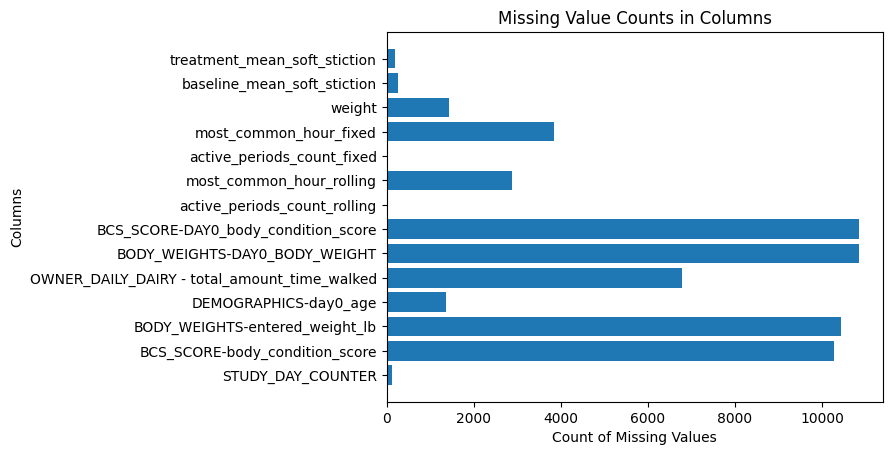

In [26]:
missing_value_counts = qualified.isna().sum()[qualified.isna().sum() > 0]

# Create a horizontal bar plot
plt.barh(missing_value_counts.index, missing_value_counts.values)

# Add labels and title
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Value Counts in Columns')


## Final Data

In [27]:
#drop Charging data
final = qualified.drop(columns=[col for col in qualified.columns if '46' in col])
final.shape

(10851, 625)

In [28]:
final.head()

,PET_ID,EXTERNAL_ID,DEVICE_ID,STUDY_ID,STUDY_NAME,PET_NAME,DATE,NORMALIZED_STUDY_DAY,NORMALIZED_QUALIFYING_STUDY_DAY,STUDY_DAY_COUNTER,STUDY_GROUP,BASELINE_START,START_DATE,ENROLLMENT_DATE,COMPLETION_DATE,END_DATE,EXCESSIVE_RUNNING,TIMEZONE,QUALIFYING_DATA_DAY,IS_QUALIFIED,DAILYDATAQUALITYINDREASON,VAR_TD_1_Q1_2,VAR_CE_1_Q1_2,VAR_MIN_1_Q1_2,VAR_MED_1_Q1_2,VAR_RANG_1_Q1_2,VAR_MAX_1_Q1_2,VAR_AVG_1_Q1_2,VAR_SD_1_Q1_2,VAR_IQR_1_Q1_2,VAR_ACE_1_Q1_2,VAR_SDCE_1_Q1_2,VAR_IQRCE_1_Q1_2,VAR_CE3SD_1_Q1_2,VAR_TD_3_Q1_2,VAR_CE_3_Q1_2,VAR_MIN_3_Q1_2,VAR_MED_3_Q1_2,VAR_RANG_3_Q1_2,VAR_MAX_3_Q1_2,VAR_AVG_3_Q1_2,VAR_SD_3_Q1_2,VAR_IQR_3_Q1_2,VAR_ACE_3_Q1_2,VAR_SDCE_3_Q1_2,VAR_IQRCE_3_Q1_2,VAR_CE3SD_3_Q1_2,VAR_TD_5_Q1_2,VAR_CE_5_Q1_2,VAR_MIN_5_Q1_2,VAR_MED_5_Q1_2,VAR_RANG_5_Q1_2,VAR_MAX_5_Q1_2,VAR_AVG_5_Q1_2,VAR_SD_5_Q1_2,VAR_IQR_5_Q1_2,VAR_ACE_5_Q1_2,VAR_SDCE_5_Q1_2,VAR_IQRCE_5_Q1_2,VAR_CE3SD_5_Q1_2,VAR_TD_4_Q1_2,VAR_CE_4_Q1_2,VAR_MIN_4_Q1_2,VAR_MED_4_Q1_2,VAR_RANG_4_Q1_2,VAR_MAX_4_Q1_2,VAR_AVG_4_Q1_2,VAR_SD_4_Q1_2,VAR_IQR_4_Q1_2,VAR_ACE_4_Q1_2,VAR_SDCE_4_Q1_2,VAR_IQRCE_4_Q1_2,VAR_CE3SD_4_Q1_2,VAR_TD_12_Q1_2,VAR_CE_12_Q1_2,VAR_MIN_12_Q1_2,VAR_MED_12_Q1_2,VAR_RANG_12_Q1_2,VAR_MAX_12_Q1_2,VAR_AVG_12_Q1_2,VAR_SD_12_Q1_2,VAR_IQR_12_Q1_2,VAR_ACE_12_Q1_2,VAR_SDCE_12_Q1_2,VAR_IQRCE_12_Q1_2,VAR_CE3SD_12_Q1_2,VAR_TD_2_Q1_2,VAR_CE_2_Q1_2,VAR_MIN_2_Q1_2,VAR_MED_2_Q1_2,VAR_RANG_2_Q1_2,VAR_MAX_2_Q1_2,VAR_AVG_2_Q1_2,VAR_SD_2_Q1_2,VAR_IQR_2_Q1_2,VAR_ACE_2_Q1_2,VAR_SDCE_2_Q1_2,VAR_IQRCE_2_Q1_2,VAR_CE3SD_2_Q1_2,VAR_TD_45_Q1_2,VAR_CE_45_Q1_2,VAR_MIN_45_Q1_2,VAR_MED_45_Q1_2,VAR_RANG_45_Q1_2,VAR_MAX_45_Q1_2,VAR_AVG_45_Q1_2,VAR_SD_45_Q1_2,VAR_IQR_45_Q1_2,VAR_ACE_45_Q1_2,VAR_SDCE_45_Q1_2,VAR_IQRCE_45_Q1_2,VAR_IDX_11_Q1_2,VAR_CE3SD_45_Q1_2,VAR_TD_1_Q2_2,VAR_CE_1_Q2_2,VAR_MIN_1_Q2_2,VAR_MED_1_Q2_2,VAR_RANG_1_Q2_2,VAR_MAX_1_Q2_2,VAR_AVG_1_Q2_2,VAR_SD_1_Q2_2,VAR_IQR_1_Q2_2,VAR_ACE_1_Q2_2,VAR_SDCE_1_Q2_2,VAR_IQRCE_1_Q2_2,VAR_CE3SD_1_Q2_2,VAR_TD_3_Q2_2,VAR_CE_3_Q2_2,VAR_MIN_3_Q2_2,VAR_MED_3_Q2_2,VAR_RANG_3_Q2_2,VAR_MAX_3_Q2_2,VAR_AVG_3_Q2_2,VAR_SD_3_Q2_2,VAR_IQR_3_Q2_2,VAR_ACE_3_Q2_2,VAR_SDCE_3_Q2_2,VAR_IQRCE_3_Q2_2,VAR_CE3SD_3_Q2_2,VAR_TD_5_Q2_2,VAR_CE_5_Q2_2,VAR_MIN_5_Q2_2,VAR_MED_5_Q2_2,VAR_RANG_5_Q2_2,VAR_MAX_5_Q2_2,VAR_AVG_5_Q2_2,VAR_SD_5_Q2_2,VAR_IQR_5_Q2_2,VAR_ACE_5_Q2_2,VAR_SDCE_5_Q2_2,VAR_IQRCE_5_Q2_2,VAR_CE3SD_5_Q2_2,VAR_TD_4_Q2_2,VAR_CE_4_Q2_2,VAR_MIN_4_Q2_2,VAR_MED_4_Q2_2,VAR_RANG_4_Q2_2,VAR_MAX_4_Q2_2,VAR_AVG_4_Q2_2,VAR_SD_4_Q2_2,VAR_IQR_4_Q2_2,VAR_ACE_4_Q2_2,VAR_SDCE_4_Q2_2,VAR_IQRCE_4_Q2_2,VAR_CE3SD_4_Q2_2,VAR_TD_12_Q2_2,VAR_CE_12_Q2_2,VAR_MIN_12_Q2_2,VAR_MED_12_Q2_2,VAR_RANG_12_Q2_2,VAR_MAX_12_Q2_2,VAR_AVG_12_Q2_2,VAR_SD_12_Q2_2,VAR_IQR_12_Q2_2,VAR_ACE_12_Q2_2,VAR_SDCE_12_Q2_2,VAR_IQRCE_12_Q2_2,VAR_CE3SD_12_Q2_2,VAR_TD_2_Q2_2,VAR_CE_2_Q2_2,VAR_MIN_2_Q2_2,VAR_MED_2_Q2_2,VAR_RANG_2_Q2_2,VAR_MAX_2_Q2_2,VAR_AVG_2_Q2_2,VAR_SD_2_Q2_2,VAR_IQR_2_Q2_2,VAR_ACE_2_Q2_2,VAR_SDCE_2_Q2_2,VAR_IQRCE_2_Q2_2,VAR_CE3SD_2_Q2_2,VAR_TD_45_Q2_2,VAR_CE_45_Q2_2,VAR_MIN_45_Q2_2,VAR_MED_45_Q2_2,VAR_RANG_45_Q2_2,VAR_MAX_45_Q2_2,VAR_AVG_45_Q2_2,VAR_SD_45_Q2_2,VAR_IQR_45_Q2_2,VAR_ACE_45_Q2_2,VAR_SDCE_45_Q2_2,VAR_IQRCE_45_Q2_2,VAR_IDX_11_Q2_2,VAR_CE3SD_45_Q2_2,VAR_TD_1_Q3_2,VAR_CE_1_Q3_2,VAR_MIN_1_Q3_2,VAR_MED_1_Q3_2,VAR_RANG_1_Q3_2,VAR_MAX_1_Q3_2,VAR_AVG_1_Q3_2,VAR_SD_1_Q3_2,VAR_IQR_1_Q3_2,VAR_ACE_1_Q3_2,VAR_SDCE_1_Q3_2,VAR_IQRCE_1_Q3_2,VAR_CE3SD_1_Q3_2,VAR_TD_3_Q3_2,VAR_CE_3_Q3_2,VAR_MIN_3_Q3_2,VAR_MED_3_Q3_2,VAR_RANG_3_Q3_2,VAR_MAX_3_Q3_2,VAR_AVG_3_Q3_2,VAR_SD_3_Q3_2,VAR_IQR_3_Q3_2,VAR_ACE_3_Q3_2,VAR_SDCE_3_Q3_2,VAR_IQRCE_3_Q3_2,VAR_CE3SD_3_Q3_2,VAR_TD_5_Q3_2,VAR_CE_5_Q3_2,VAR_MIN_5_Q3_2,VAR_MED_5_Q3_2,VAR_RANG_5_Q3_2,VAR_MAX_5_Q3_2,VAR_AVG_5_Q3_2,VAR_SD_5_Q3_2,VAR_IQR_5_Q3_2,VAR_ACE_5_Q3_2,VAR_SDCE_5_Q3_2,VAR_IQRCE_5_Q3_2,VAR_CE3SD_5_Q3_2,VAR_TD_4_Q3_2,VAR_CE_4_Q3_2,VAR_MIN_4_Q3_2,VAR_MED_4_Q3_2,VAR_RANG_4_Q3_2,VAR_MAX_4_Q3_2,VAR_AVG_4_Q3_2,VAR_SD_4_Q3_2,VAR_IQR_4_Q3_2,VAR_ACE_4_Q3_2,VAR_SDCE_4_Q3_2,VAR_IQRCE_4_Q3_2,VAR_CE3SD_4_Q3_2,VAR_TD_12_Q3_2,VAR_CE_12_Q3_2,VAR_MIN_12_Q3_2,VAR_ME

# Counting the unique participants for the study

In [29]:
data['PET_ID'].nunique()

146

In [30]:
qualified['PET_ID'].nunique()

136

In [31]:
data.groupby('study_food')['PET_ID'].nunique()

study_food
Black    55
None     37
Peach    54
Name: PET_ID, dtype: int64

In [32]:
qualified.groupby('study_food')['PET_ID'].nunique()

study_food
Black    55
None     27
Peach    54
Name: PET_ID, dtype: int64

In [33]:
# Check if there is one PET_ID maches multiple PET_NAMEs
unique_pet_name_counts = final.groupby('PET_ID')['PET_NAME'].nunique()
pet_ids_with_multiple_pet_names = unique_pet_name_counts[unique_pet_name_counts > 1].index

# Display pet names and their corresponding multiple pet_ids
for pet_id in pet_ids_with_multiple_pet_names:
    pet_names = final[final['PET_ID'] == pet_id]['PET_NAME'].unique()
    print(f"Pet id: {pet_id}, Pet names: {list(pet_names)}")

# Counting the unique devices

In [34]:
data['DEVICE_ID'].nunique()

212

In [35]:
qualified['DEVICE_ID'].nunique()

193

In [36]:
data.groupby('study_food')['DEVICE_ID'].nunique()

study_food
Black    84
None     49
Peach    79
Name: DEVICE_ID, dtype: int64

In [37]:
qualified.groupby('study_food')['DEVICE_ID'].nunique()

study_food
Black    81
None     33
Peach    79
Name: DEVICE_ID, dtype: int64

# Counting the unique devices per participant

In [38]:
qualified.groupby(['PET_ID']).agg({'DEVICE_ID':'nunique'}).sort_values(['DEVICE_ID'],ascending=True)

,DEVICE_ID
PET_ID,
4078,1
4337,1
4335,1
4332,1
4331,1
4329,1
4304,1
4276,1
4174,1


([<matplotlib.axis.XTick at 0x7fcd12fd1c10>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

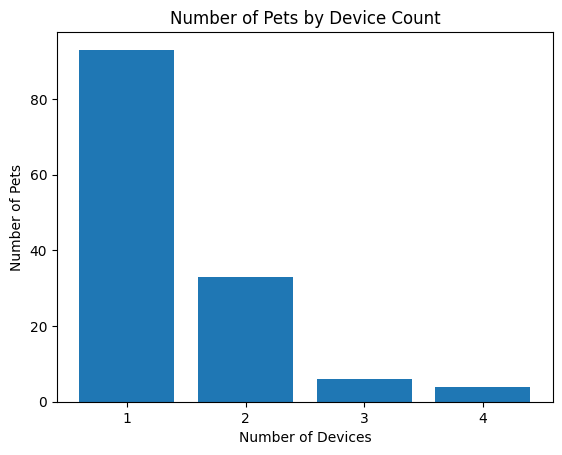

In [39]:
# Count how many pets used 1,2,3,...9 unique devices
device_counts = qualified.groupby('PET_ID')['DEVICE_ID'].nunique()
pet_counts = device_counts.value_counts().sort_index()

# Plot the pet counts
plt.bar(pet_counts.index, pet_counts.values)
plt.xlabel('Number of Devices')
plt.ylabel('Number of Pets')
plt.title('Number of Pets by Device Count')
plt.xticks(range(1, pet_counts.index.max() + 1))
# Most pets use 1 or 2 devices

# Study day counter

In [40]:
data.agg({'DATE':'nunique'})

DATE    855
dtype: int64

In [41]:
qualified.agg({'DATE':'nunique'})

DATE    839
dtype: int64

In [42]:
qualified.groupby(['study_food']).agg({'DATE':'nunique'})

,DATE
study_food,
Black,680
None,366
Peach,771


In [43]:
final.groupby(['PET_ID']).agg({'DATE':'nunique'}).mean()

DATE    79.786765
dtype: float64

In [44]:
final.groupby(['PET_ID']).agg({'DATE':'nunique'}).sort_values(['DATE'],ascending=True)

,DATE
PET_ID,
4331,1
3430,1
3431,1
3425,2
3435,3
3645,3
4158,6
4073,6
4371,6


In [45]:
low_to_high_dates=final.groupby(['PET_ID']).agg({'DATE':'nunique'})\
                    .sort_values(['DATE'],ascending=False).reset_index()

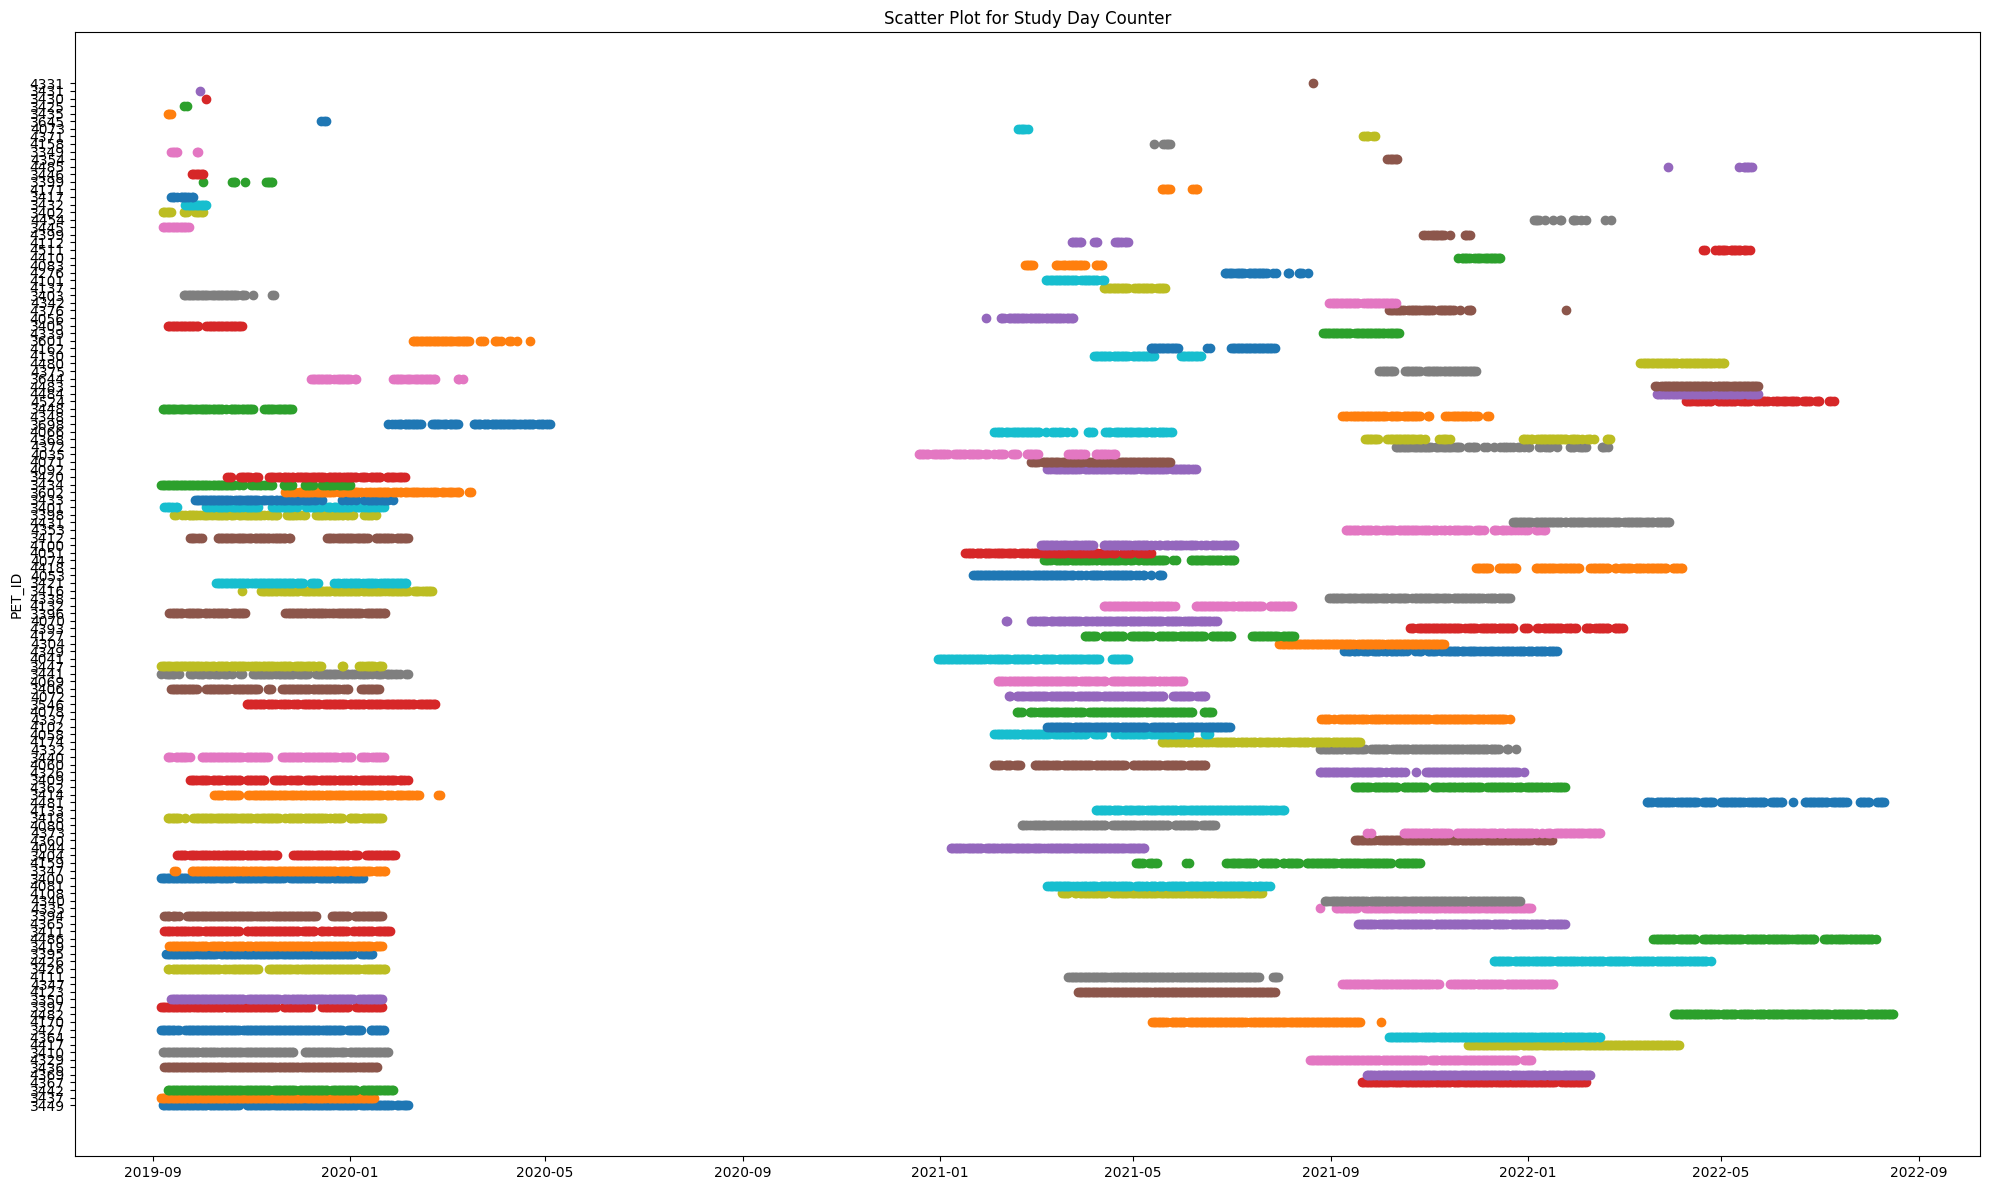

In [46]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.set_title('Scatter Plot for Study Day Counter')
ax.set_ylabel('PET_ID')  # Set the y-axis label

pet_ids = low_to_high_dates['PET_ID'].values
y_ticks = range(len(pet_ids))
y_tick_labels = pet_ids.tolist()

for i, pet_id in enumerate(pet_ids):
    one_pet = final[final['PET_ID'] == pet_id]
    ax.scatter(one_pet['DATE'].values, [i] * len(one_pet))

plt.yticks(y_ticks, y_tick_labels)  # Set the y-axis tick labels

plt.tight_layout()

# Start and end dates of data collection

In [47]:
final['START_DATE'] = pd.to_datetime(final['START_DATE']).dt.date
final['END_DATE'] = pd.to_datetime(final['END_DATE']).dt.date

# Total for the study
overall_min_start_date = final['START_DATE'].min()
overall_max_end_date = final['END_DATE'].max()

In [48]:
overall_min_start_date.strftime('%Y-%m-%d')

'2019-05-09'

In [49]:
overall_max_end_date.strftime('%Y-%m-%d')

'2022-11-07'

In [50]:
# Per study group
date_range = final.groupby('study_food').agg({'START_DATE': 'min', 'END_DATE': 'max'})
print(date_range)

            START_DATE    END_DATE
study_food                        
Black       2019-05-09  2022-09-02
None        2019-05-09  2021-12-15
Peach       2019-05-09  2022-11-07


In [51]:
# Per participant
date_range = final.groupby('PET_ID').agg({'START_DATE': 'min', 'END_DATE': 'max'})
print(date_range)

        START_DATE    END_DATE
PET_ID                        
3347    2019-10-09  2020-05-02
3349    2019-11-09  2019-09-30
3350    2019-11-09  2020-01-22
3394    2019-07-09  2020-01-27
3395    2019-08-09  2020-01-16
3396    2019-10-09  2020-04-02
3397    2019-05-09  2020-01-22
3398    2019-10-09  2020-04-02
3399    2019-09-30  2019-11-15
3400    2019-05-09  2020-01-13
3401    2019-07-09  2020-01-24
3402    2019-06-09  2019-03-10
3403    2019-09-19  2019-11-20
3404    2019-09-15  2020-01-29
3405    2019-09-09  2019-11-22
3406    2019-10-09  2020-01-20
3409    2019-09-23  2020-07-02
3410    2019-06-09  2020-06-02
3411    2019-07-09  2020-04-02
3412    2019-09-23  2020-07-02
3414    2019-08-10  2020-02-28
3416    2019-10-24  2020-02-28
3417    2019-11-09  2019-09-30
3418    2019-05-09  2020-01-31
3419    2019-10-09  2020-01-28
3420    2019-09-28  2020-07-02
3421    2019-09-10  2020-07-02
3425    2019-06-09  2019-09-23
3426    2019-09-09  2020-07-02
3427    2019-05-09  2020-06-02
3430    

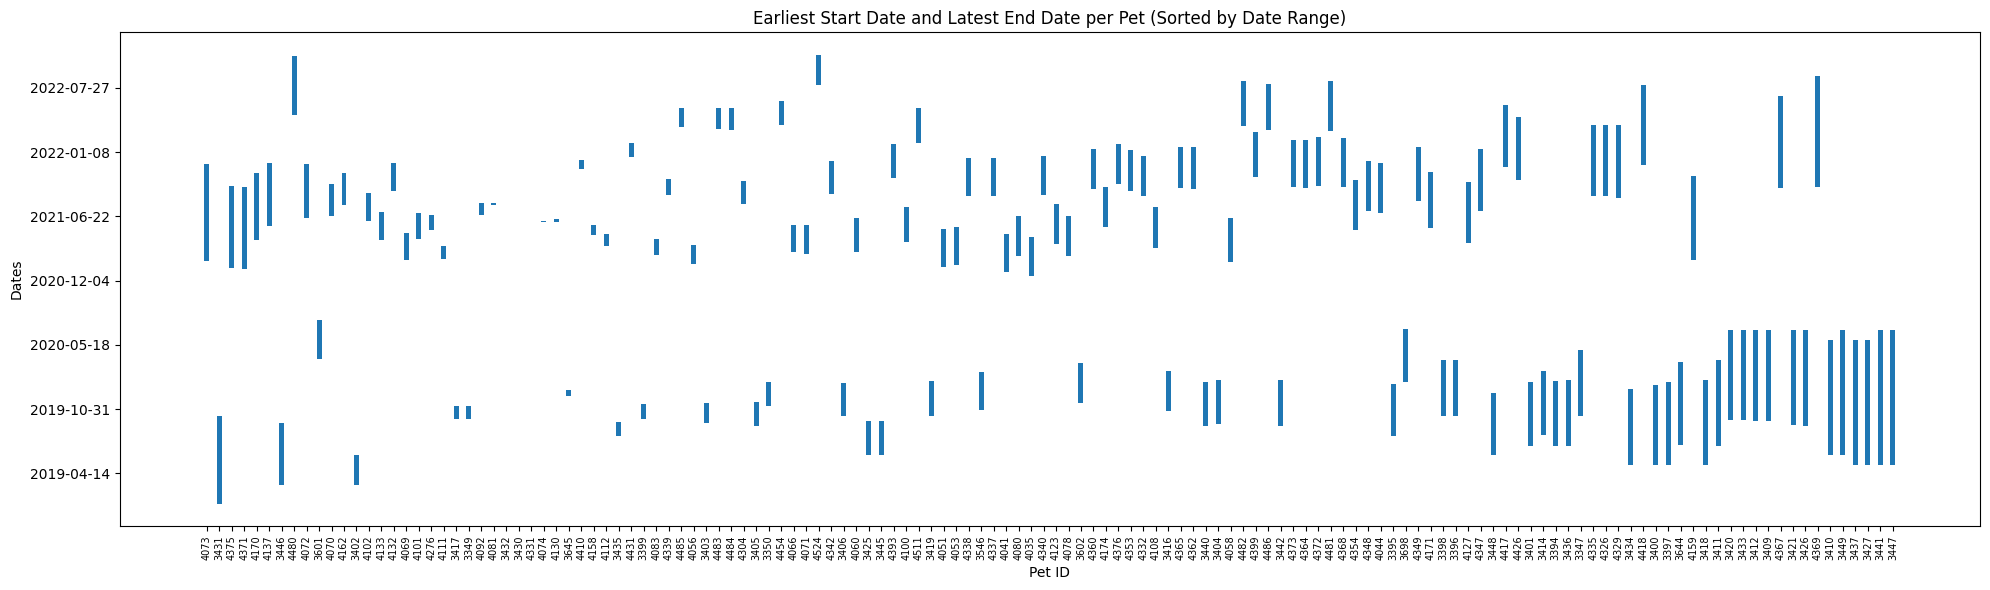

In [52]:
# Calculate the date range and sort the DataFrame by it in ascending order
date_range['DATE_RANGE'] = date_range['END_DATE'] - date_range['START_DATE']
date_range = date_range.sort_values('DATE_RANGE', ascending=True)

# Calculate the heights of the bars as the difference between the END_DATE and START_DATE values
heights = (date_range['END_DATE'].values - date_range['START_DATE'].values).astype('timedelta64[D]')

# Sort the date_range DataFrame by the heights
date_range['HEIGHTS'] = heights
date_range = date_range.sort_values('HEIGHTS', ascending=True)

fig, ax = plt.subplots(figsize=(20, 6))

index = np.arange(len(date_range))
bar_width = 0.4

bars = ax.bar(index, date_range['HEIGHTS'], bar_width, bottom=date_range['START_DATE'].values, label='Date Range')

ax.set_xlabel('Pet ID')
ax.set_ylabel('Dates')
ax.set_title('Earliest Start Date and Latest End Date per Pet (Sorted by Date Range)')
ax.set_xticks(index)
ax.set_xticklabels(date_range.index)

def date_formatter(x, pos):
    return pd.to_datetime(x, unit='D', origin='1970-01-01').strftime('%Y-%m-%d')

formatter = FuncFormatter(date_formatter)
ax.yaxis.set_major_formatter(formatter)

plt.xticks(fontsize=7, rotation=90)
fig.tight_layout()

plt.savefig('sorted_pet_date_range_plot.pdf', format='pdf')

In [53]:
# Per device per participant
date_range = final.groupby(['DEVICE_ID', 'PET_ID']).agg({'START_DATE': 'min', 'END_DATE': 'max'})
print(date_range.sort_values(by=['DEVICE_ID', 'PET_ID']))

                  START_DATE    END_DATE
DEVICE_ID PET_ID                        
682       4485    2022-03-27  2022-05-25
2071      3412    2019-09-23  2020-07-02
2225      4072    2021-12-02  2021-06-16
12828     4066    2021-03-02  2021-05-26
12843     4053    2021-01-22  2021-05-20
13034     3347    2019-10-09  2020-05-02
13036     3349    2019-11-09  2019-09-30
13037     3350    2019-11-09  2020-01-22
13073     3394    2019-07-09  2020-01-27
13074     3395    2019-08-09  2020-01-16
13075     3396    2019-10-09  2020-04-02
13076     3397    2019-05-09  2020-01-22
13077     3398    2019-10-09  2020-04-02
13078     3399    2019-09-30  2019-11-15
13079     3400    2019-05-09  2020-01-13
13080     3401    2019-07-09  2020-01-24
13081     3402    2019-06-09  2019-03-10
13082     3403    2019-09-19  2019-11-20
13083     3404    2019-09-15  2020-01-29
13084     3405    2019-09-09  2019-11-22
13085     3406    2019-10-09  2020-01-20
13088     3409    2019-09-23  2020-07-02
13089     3410  

# Number of baseline/intervention period days

In [54]:
day = 'NORMALIZED_QUALIFYING_STUDY_DAY_NEW'
#final['NORMALIZED_QUALIFYING_STUDY_DAY_NEW'] = pd.to_numeric(final['NORMALIZED_QUALIFYING_STUDY_DAY_NEW'], errors='coerce').astype(float)
baseline = final[final[day] < 0]
intervention = final[final[day] >= 0]

In [55]:
baseline.head()

,PET_ID,EXTERNAL_ID,DEVICE_ID,STUDY_ID,STUDY_NAME,PET_NAME,DATE,NORMALIZED_STUDY_DAY,NORMALIZED_QUALIFYING_STUDY_DAY,STUDY_DAY_COUNTER,STUDY_GROUP,BASELINE_START,START_DATE,ENROLLMENT_DATE,COMPLETION_DATE,END_DATE,EXCESSIVE_RUNNING,TIMEZONE,QUALIFYING_DATA_DAY,IS_QUALIFIED,DAILYDATAQUALITYINDREASON,VAR_TD_1_Q1_2,VAR_CE_1_Q1_2,VAR_MIN_1_Q1_2,VAR_MED_1_Q1_2,VAR_RANG_1_Q1_2,VAR_MAX_1_Q1_2,VAR_AVG_1_Q1_2,VAR_SD_1_Q1_2,VAR_IQR_1_Q1_2,VAR_ACE_1_Q1_2,VAR_SDCE_1_Q1_2,VAR_IQRCE_1_Q1_2,VAR_CE3SD_1_Q1_2,VAR_TD_3_Q1_2,VAR_CE_3_Q1_2,VAR_MIN_3_Q1_2,VAR_MED_3_Q1_2,VAR_RANG_3_Q1_2,VAR_MAX_3_Q1_2,VAR_AVG_3_Q1_2,VAR_SD_3_Q1_2,VAR_IQR_3_Q1_2,VAR_ACE_3_Q1_2,VAR_SDCE_3_Q1_2,VAR_IQRCE_3_Q1_2,VAR_CE3SD_3_Q1_2,VAR_TD_5_Q1_2,VAR_CE_5_Q1_2,VAR_MIN_5_Q1_2,VAR_MED_5_Q1_2,VAR_RANG_5_Q1_2,VAR_MAX_5_Q1_2,VAR_AVG_5_Q1_2,VAR_SD_5_Q1_2,VAR_IQR_5_Q1_2,VAR_ACE_5_Q1_2,VAR_SDCE_5_Q1_2,VAR_IQRCE_5_Q1_2,VAR_CE3SD_5_Q1_2,VAR_TD_4_Q1_2,VAR_CE_4_Q1_2,VAR_MIN_4_Q1_2,VAR_MED_4_Q1_2,VAR_RANG_4_Q1_2,VAR_MAX_4_Q1_2,VAR_AVG_4_Q1_2,VAR_SD_4_Q1_2,VAR_IQR_4_Q1_2,VAR_ACE_4_Q1_2,VAR_SDCE_4_Q1_2,VAR_IQRCE_4_Q1_2,VAR_CE3SD_4_Q1_2,VAR_TD_12_Q1_2,VAR_CE_12_Q1_2,VAR_MIN_12_Q1_2,VAR_MED_12_Q1_2,VAR_RANG_12_Q1_2,VAR_MAX_12_Q1_2,VAR_AVG_12_Q1_2,VAR_SD_12_Q1_2,VAR_IQR_12_Q1_2,VAR_ACE_12_Q1_2,VAR_SDCE_12_Q1_2,VAR_IQRCE_12_Q1_2,VAR_CE3SD_12_Q1_2,VAR_TD_2_Q1_2,VAR_CE_2_Q1_2,VAR_MIN_2_Q1_2,VAR_MED_2_Q1_2,VAR_RANG_2_Q1_2,VAR_MAX_2_Q1_2,VAR_AVG_2_Q1_2,VAR_SD_2_Q1_2,VAR_IQR_2_Q1_2,VAR_ACE_2_Q1_2,VAR_SDCE_2_Q1_2,VAR_IQRCE_2_Q1_2,VAR_CE3SD_2_Q1_2,VAR_TD_45_Q1_2,VAR_CE_45_Q1_2,VAR_MIN_45_Q1_2,VAR_MED_45_Q1_2,VAR_RANG_45_Q1_2,VAR_MAX_45_Q1_2,VAR_AVG_45_Q1_2,VAR_SD_45_Q1_2,VAR_IQR_45_Q1_2,VAR_ACE_45_Q1_2,VAR_SDCE_45_Q1_2,VAR_IQRCE_45_Q1_2,VAR_IDX_11_Q1_2,VAR_CE3SD_45_Q1_2,VAR_TD_1_Q2_2,VAR_CE_1_Q2_2,VAR_MIN_1_Q2_2,VAR_MED_1_Q2_2,VAR_RANG_1_Q2_2,VAR_MAX_1_Q2_2,VAR_AVG_1_Q2_2,VAR_SD_1_Q2_2,VAR_IQR_1_Q2_2,VAR_ACE_1_Q2_2,VAR_SDCE_1_Q2_2,VAR_IQRCE_1_Q2_2,VAR_CE3SD_1_Q2_2,VAR_TD_3_Q2_2,VAR_CE_3_Q2_2,VAR_MIN_3_Q2_2,VAR_MED_3_Q2_2,VAR_RANG_3_Q2_2,VAR_MAX_3_Q2_2,VAR_AVG_3_Q2_2,VAR_SD_3_Q2_2,VAR_IQR_3_Q2_2,VAR_ACE_3_Q2_2,VAR_SDCE_3_Q2_2,VAR_IQRCE_3_Q2_2,VAR_CE3SD_3_Q2_2,VAR_TD_5_Q2_2,VAR_CE_5_Q2_2,VAR_MIN_5_Q2_2,VAR_MED_5_Q2_2,VAR_RANG_5_Q2_2,VAR_MAX_5_Q2_2,VAR_AVG_5_Q2_2,VAR_SD_5_Q2_2,VAR_IQR_5_Q2_2,VAR_ACE_5_Q2_2,VAR_SDCE_5_Q2_2,VAR_IQRCE_5_Q2_2,VAR_CE3SD_5_Q2_2,VAR_TD_4_Q2_2,VAR_CE_4_Q2_2,VAR_MIN_4_Q2_2,VAR_MED_4_Q2_2,VAR_RANG_4_Q2_2,VAR_MAX_4_Q2_2,VAR_AVG_4_Q2_2,VAR_SD_4_Q2_2,VAR_IQR_4_Q2_2,VAR_ACE_4_Q2_2,VAR_SDCE_4_Q2_2,VAR_IQRCE_4_Q2_2,VAR_CE3SD_4_Q2_2,VAR_TD_12_Q2_2,VAR_CE_12_Q2_2,VAR_MIN_12_Q2_2,VAR_MED_12_Q2_2,VAR_RANG_12_Q2_2,VAR_MAX_12_Q2_2,VAR_AVG_12_Q2_2,VAR_SD_12_Q2_2,VAR_IQR_12_Q2_2,VAR_ACE_12_Q2_2,VAR_SDCE_12_Q2_2,VAR_IQRCE_12_Q2_2,VAR_CE3SD_12_Q2_2,VAR_TD_2_Q2_2,VAR_CE_2_Q2_2,VAR_MIN_2_Q2_2,VAR_MED_2_Q2_2,VAR_RANG_2_Q2_2,VAR_MAX_2_Q2_2,VAR_AVG_2_Q2_2,VAR_SD_2_Q2_2,VAR_IQR_2_Q2_2,VAR_ACE_2_Q2_2,VAR_SDCE_2_Q2_2,VAR_IQRCE_2_Q2_2,VAR_CE3SD_2_Q2_2,VAR_TD_45_Q2_2,VAR_CE_45_Q2_2,VAR_MIN_45_Q2_2,VAR_MED_45_Q2_2,VAR_RANG_45_Q2_2,VAR_MAX_45_Q2_2,VAR_AVG_45_Q2_2,VAR_SD_45_Q2_2,VAR_IQR_45_Q2_2,VAR_ACE_45_Q2_2,VAR_SDCE_45_Q2_2,VAR_IQRCE_45_Q2_2,VAR_IDX_11_Q2_2,VAR_CE3SD_45_Q2_2,VAR_TD_1_Q3_2,VAR_CE_1_Q3_2,VAR_MIN_1_Q3_2,VAR_MED_1_Q3_2,VAR_RANG_1_Q3_2,VAR_MAX_1_Q3_2,VAR_AVG_1_Q3_2,VAR_SD_1_Q3_2,VAR_IQR_1_Q3_2,VAR_ACE_1_Q3_2,VAR_SDCE_1_Q3_2,VAR_IQRCE_1_Q3_2,VAR_CE3SD_1_Q3_2,VAR_TD_3_Q3_2,VAR_CE_3_Q3_2,VAR_MIN_3_Q3_2,VAR_MED_3_Q3_2,VAR_RANG_3_Q3_2,VAR_MAX_3_Q3_2,VAR_AVG_3_Q3_2,VAR_SD_3_Q3_2,VAR_IQR_3_Q3_2,VAR_ACE_3_Q3_2,VAR_SDCE_3_Q3_2,VAR_IQRCE_3_Q3_2,VAR_CE3SD_3_Q3_2,VAR_TD_5_Q3_2,VAR_CE_5_Q3_2,VAR_MIN_5_Q3_2,VAR_MED_5_Q3_2,VAR_RANG_5_Q3_2,VAR_MAX_5_Q3_2,VAR_AVG_5_Q3_2,VAR_SD_5_Q3_2,VAR_IQR_5_Q3_2,VAR_ACE_5_Q3_2,VAR_SDCE_5_Q3_2,VAR_IQRCE_5_Q3_2,VAR_CE3SD_5_Q3_2,VAR_TD_4_Q3_2,VAR_CE_4_Q3_2,VAR_MIN_4_Q3_2,VAR_MED_4_Q3_2,VAR_RANG_4_Q3_2,VAR_MAX_4_Q3_2,VAR_AVG_4_Q3_2,VAR_SD_4_Q3_2,VAR_IQR_4_Q3_2,VAR_ACE_4_Q3_2,VAR_SDCE_4_Q3_2,VAR_IQRCE_4_Q3_2,VAR_CE3SD_4_Q3_2,VAR_TD_12_Q3_2,VAR_CE_12_Q3_2,VAR_MIN_12_Q3_2,VAR_ME

In [56]:
intervention.head()

,PET_ID,EXTERNAL_ID,DEVICE_ID,STUDY_ID,STUDY_NAME,PET_NAME,DATE,NORMALIZED_STUDY_DAY,NORMALIZED_QUALIFYING_STUDY_DAY,STUDY_DAY_COUNTER,STUDY_GROUP,BASELINE_START,START_DATE,ENROLLMENT_DATE,COMPLETION_DATE,END_DATE,EXCESSIVE_RUNNING,TIMEZONE,QUALIFYING_DATA_DAY,IS_QUALIFIED,DAILYDATAQUALITYINDREASON,VAR_TD_1_Q1_2,VAR_CE_1_Q1_2,VAR_MIN_1_Q1_2,VAR_MED_1_Q1_2,VAR_RANG_1_Q1_2,VAR_MAX_1_Q1_2,VAR_AVG_1_Q1_2,VAR_SD_1_Q1_2,VAR_IQR_1_Q1_2,VAR_ACE_1_Q1_2,VAR_SDCE_1_Q1_2,VAR_IQRCE_1_Q1_2,VAR_CE3SD_1_Q1_2,VAR_TD_3_Q1_2,VAR_CE_3_Q1_2,VAR_MIN_3_Q1_2,VAR_MED_3_Q1_2,VAR_RANG_3_Q1_2,VAR_MAX_3_Q1_2,VAR_AVG_3_Q1_2,VAR_SD_3_Q1_2,VAR_IQR_3_Q1_2,VAR_ACE_3_Q1_2,VAR_SDCE_3_Q1_2,VAR_IQRCE_3_Q1_2,VAR_CE3SD_3_Q1_2,VAR_TD_5_Q1_2,VAR_CE_5_Q1_2,VAR_MIN_5_Q1_2,VAR_MED_5_Q1_2,VAR_RANG_5_Q1_2,VAR_MAX_5_Q1_2,VAR_AVG_5_Q1_2,VAR_SD_5_Q1_2,VAR_IQR_5_Q1_2,VAR_ACE_5_Q1_2,VAR_SDCE_5_Q1_2,VAR_IQRCE_5_Q1_2,VAR_CE3SD_5_Q1_2,VAR_TD_4_Q1_2,VAR_CE_4_Q1_2,VAR_MIN_4_Q1_2,VAR_MED_4_Q1_2,VAR_RANG_4_Q1_2,VAR_MAX_4_Q1_2,VAR_AVG_4_Q1_2,VAR_SD_4_Q1_2,VAR_IQR_4_Q1_2,VAR_ACE_4_Q1_2,VAR_SDCE_4_Q1_2,VAR_IQRCE_4_Q1_2,VAR_CE3SD_4_Q1_2,VAR_TD_12_Q1_2,VAR_CE_12_Q1_2,VAR_MIN_12_Q1_2,VAR_MED_12_Q1_2,VAR_RANG_12_Q1_2,VAR_MAX_12_Q1_2,VAR_AVG_12_Q1_2,VAR_SD_12_Q1_2,VAR_IQR_12_Q1_2,VAR_ACE_12_Q1_2,VAR_SDCE_12_Q1_2,VAR_IQRCE_12_Q1_2,VAR_CE3SD_12_Q1_2,VAR_TD_2_Q1_2,VAR_CE_2_Q1_2,VAR_MIN_2_Q1_2,VAR_MED_2_Q1_2,VAR_RANG_2_Q1_2,VAR_MAX_2_Q1_2,VAR_AVG_2_Q1_2,VAR_SD_2_Q1_2,VAR_IQR_2_Q1_2,VAR_ACE_2_Q1_2,VAR_SDCE_2_Q1_2,VAR_IQRCE_2_Q1_2,VAR_CE3SD_2_Q1_2,VAR_TD_45_Q1_2,VAR_CE_45_Q1_2,VAR_MIN_45_Q1_2,VAR_MED_45_Q1_2,VAR_RANG_45_Q1_2,VAR_MAX_45_Q1_2,VAR_AVG_45_Q1_2,VAR_SD_45_Q1_2,VAR_IQR_45_Q1_2,VAR_ACE_45_Q1_2,VAR_SDCE_45_Q1_2,VAR_IQRCE_45_Q1_2,VAR_IDX_11_Q1_2,VAR_CE3SD_45_Q1_2,VAR_TD_1_Q2_2,VAR_CE_1_Q2_2,VAR_MIN_1_Q2_2,VAR_MED_1_Q2_2,VAR_RANG_1_Q2_2,VAR_MAX_1_Q2_2,VAR_AVG_1_Q2_2,VAR_SD_1_Q2_2,VAR_IQR_1_Q2_2,VAR_ACE_1_Q2_2,VAR_SDCE_1_Q2_2,VAR_IQRCE_1_Q2_2,VAR_CE3SD_1_Q2_2,VAR_TD_3_Q2_2,VAR_CE_3_Q2_2,VAR_MIN_3_Q2_2,VAR_MED_3_Q2_2,VAR_RANG_3_Q2_2,VAR_MAX_3_Q2_2,VAR_AVG_3_Q2_2,VAR_SD_3_Q2_2,VAR_IQR_3_Q2_2,VAR_ACE_3_Q2_2,VAR_SDCE_3_Q2_2,VAR_IQRCE_3_Q2_2,VAR_CE3SD_3_Q2_2,VAR_TD_5_Q2_2,VAR_CE_5_Q2_2,VAR_MIN_5_Q2_2,VAR_MED_5_Q2_2,VAR_RANG_5_Q2_2,VAR_MAX_5_Q2_2,VAR_AVG_5_Q2_2,VAR_SD_5_Q2_2,VAR_IQR_5_Q2_2,VAR_ACE_5_Q2_2,VAR_SDCE_5_Q2_2,VAR_IQRCE_5_Q2_2,VAR_CE3SD_5_Q2_2,VAR_TD_4_Q2_2,VAR_CE_4_Q2_2,VAR_MIN_4_Q2_2,VAR_MED_4_Q2_2,VAR_RANG_4_Q2_2,VAR_MAX_4_Q2_2,VAR_AVG_4_Q2_2,VAR_SD_4_Q2_2,VAR_IQR_4_Q2_2,VAR_ACE_4_Q2_2,VAR_SDCE_4_Q2_2,VAR_IQRCE_4_Q2_2,VAR_CE3SD_4_Q2_2,VAR_TD_12_Q2_2,VAR_CE_12_Q2_2,VAR_MIN_12_Q2_2,VAR_MED_12_Q2_2,VAR_RANG_12_Q2_2,VAR_MAX_12_Q2_2,VAR_AVG_12_Q2_2,VAR_SD_12_Q2_2,VAR_IQR_12_Q2_2,VAR_ACE_12_Q2_2,VAR_SDCE_12_Q2_2,VAR_IQRCE_12_Q2_2,VAR_CE3SD_12_Q2_2,VAR_TD_2_Q2_2,VAR_CE_2_Q2_2,VAR_MIN_2_Q2_2,VAR_MED_2_Q2_2,VAR_RANG_2_Q2_2,VAR_MAX_2_Q2_2,VAR_AVG_2_Q2_2,VAR_SD_2_Q2_2,VAR_IQR_2_Q2_2,VAR_ACE_2_Q2_2,VAR_SDCE_2_Q2_2,VAR_IQRCE_2_Q2_2,VAR_CE3SD_2_Q2_2,VAR_TD_45_Q2_2,VAR_CE_45_Q2_2,VAR_MIN_45_Q2_2,VAR_MED_45_Q2_2,VAR_RANG_45_Q2_2,VAR_MAX_45_Q2_2,VAR_AVG_45_Q2_2,VAR_SD_45_Q2_2,VAR_IQR_45_Q2_2,VAR_ACE_45_Q2_2,VAR_SDCE_45_Q2_2,VAR_IQRCE_45_Q2_2,VAR_IDX_11_Q2_2,VAR_CE3SD_45_Q2_2,VAR_TD_1_Q3_2,VAR_CE_1_Q3_2,VAR_MIN_1_Q3_2,VAR_MED_1_Q3_2,VAR_RANG_1_Q3_2,VAR_MAX_1_Q3_2,VAR_AVG_1_Q3_2,VAR_SD_1_Q3_2,VAR_IQR_1_Q3_2,VAR_ACE_1_Q3_2,VAR_SDCE_1_Q3_2,VAR_IQRCE_1_Q3_2,VAR_CE3SD_1_Q3_2,VAR_TD_3_Q3_2,VAR_CE_3_Q3_2,VAR_MIN_3_Q3_2,VAR_MED_3_Q3_2,VAR_RANG_3_Q3_2,VAR_MAX_3_Q3_2,VAR_AVG_3_Q3_2,VAR_SD_3_Q3_2,VAR_IQR_3_Q3_2,VAR_ACE_3_Q3_2,VAR_SDCE_3_Q3_2,VAR_IQRCE_3_Q3_2,VAR_CE3SD_3_Q3_2,VAR_TD_5_Q3_2,VAR_CE_5_Q3_2,VAR_MIN_5_Q3_2,VAR_MED_5_Q3_2,VAR_RANG_5_Q3_2,VAR_MAX_5_Q3_2,VAR_AVG_5_Q3_2,VAR_SD_5_Q3_2,VAR_IQR_5_Q3_2,VAR_ACE_5_Q3_2,VAR_SDCE_5_Q3_2,VAR_IQRCE_5_Q3_2,VAR_CE3SD_5_Q3_2,VAR_TD_4_Q3_2,VAR_CE_4_Q3_2,VAR_MIN_4_Q3_2,VAR_MED_4_Q3_2,VAR_RANG_4_Q3_2,VAR_MAX_4_Q3_2,VAR_AVG_4_Q3_2,VAR_SD_4_Q3_2,VAR_IQR_4_Q3_2,VAR_ACE_4_Q3_2,VAR_SDCE_4_Q3_2,VAR_IQRCE_4_Q3_2,VAR_CE3SD_4_Q3_2,VAR_TD_12_Q3_2,VAR_CE_12_Q3_2,VAR_MIN_12_Q3_2,VAR_ME

In [57]:
baseline.agg({'DATE':'nunique'})

DATE    622
dtype: int64

In [58]:
intervention.agg({'DATE':'nunique'})

DATE    778
dtype: int64

In [59]:
baseline.groupby(['PET_ID']).agg({'DATE':'nunique'}).mean()

DATE    26.222222
dtype: float64

In [60]:
intervention.groupby(['PET_ID']).agg({'DATE':'nunique'}).mean()

DATE    58.960938
dtype: float64

In [61]:
baseline.groupby(['PET_ID']).agg({'DATE':'nunique'}).mean()

DATE    26.222222
dtype: float64

In [62]:
baseline.groupby(['study_food']).agg({'DATE':'nunique'})

,DATE
study_food,
Black,490
None,183
Peach,443


In [63]:
intervention.groupby(['study_food']).agg({'DATE':'nunique'})

,DATE
study_food,
Black,621
None,274
Peach,685


In [66]:
low_to_high_dates_baseline=baseline.groupby(['PET_ID']).agg({'DATE':'nunique'})\
                    .sort_values(['DATE'],ascending=False).reset_index()

In [67]:
print(low_to_high_dates_baseline)

     PET_ID  DATE
0      4417    52
1      4431    49
2      4369    46
3      4367    44
4      4480    43
5      4329    43
6      4375    42
7      4484    41
8      4426    40
9      4483    39
10     4170    39
11     4092    38
12     4304    38
13     4058    38
14     4132    37
15     4339    37
16     4123    37
17     4035    37
18     3436    36
19     4347    36
20     4162    35
21     4326    35
22     4376    35
23     4340    34
24     4524    34
25     4342    34
26     4418    34
27     4348    33
28     4481    33
29     4360    33
30     4368    33
31     4482    33
32     4332    32
33     4372    32
34     4276    32
35     4486    32
36     4362    31
37     4365    31
38     4335    31
39     4174    31
40     4393    31
41     4127    31
42     4111    30
43     4373    30
44     4130    30
45     4041    30
46     4100    29
47     4337    29
48     4069    29
49     4338    29
50     4080    29
51     3414    29
52     4044    29
53     4349    28
54     413

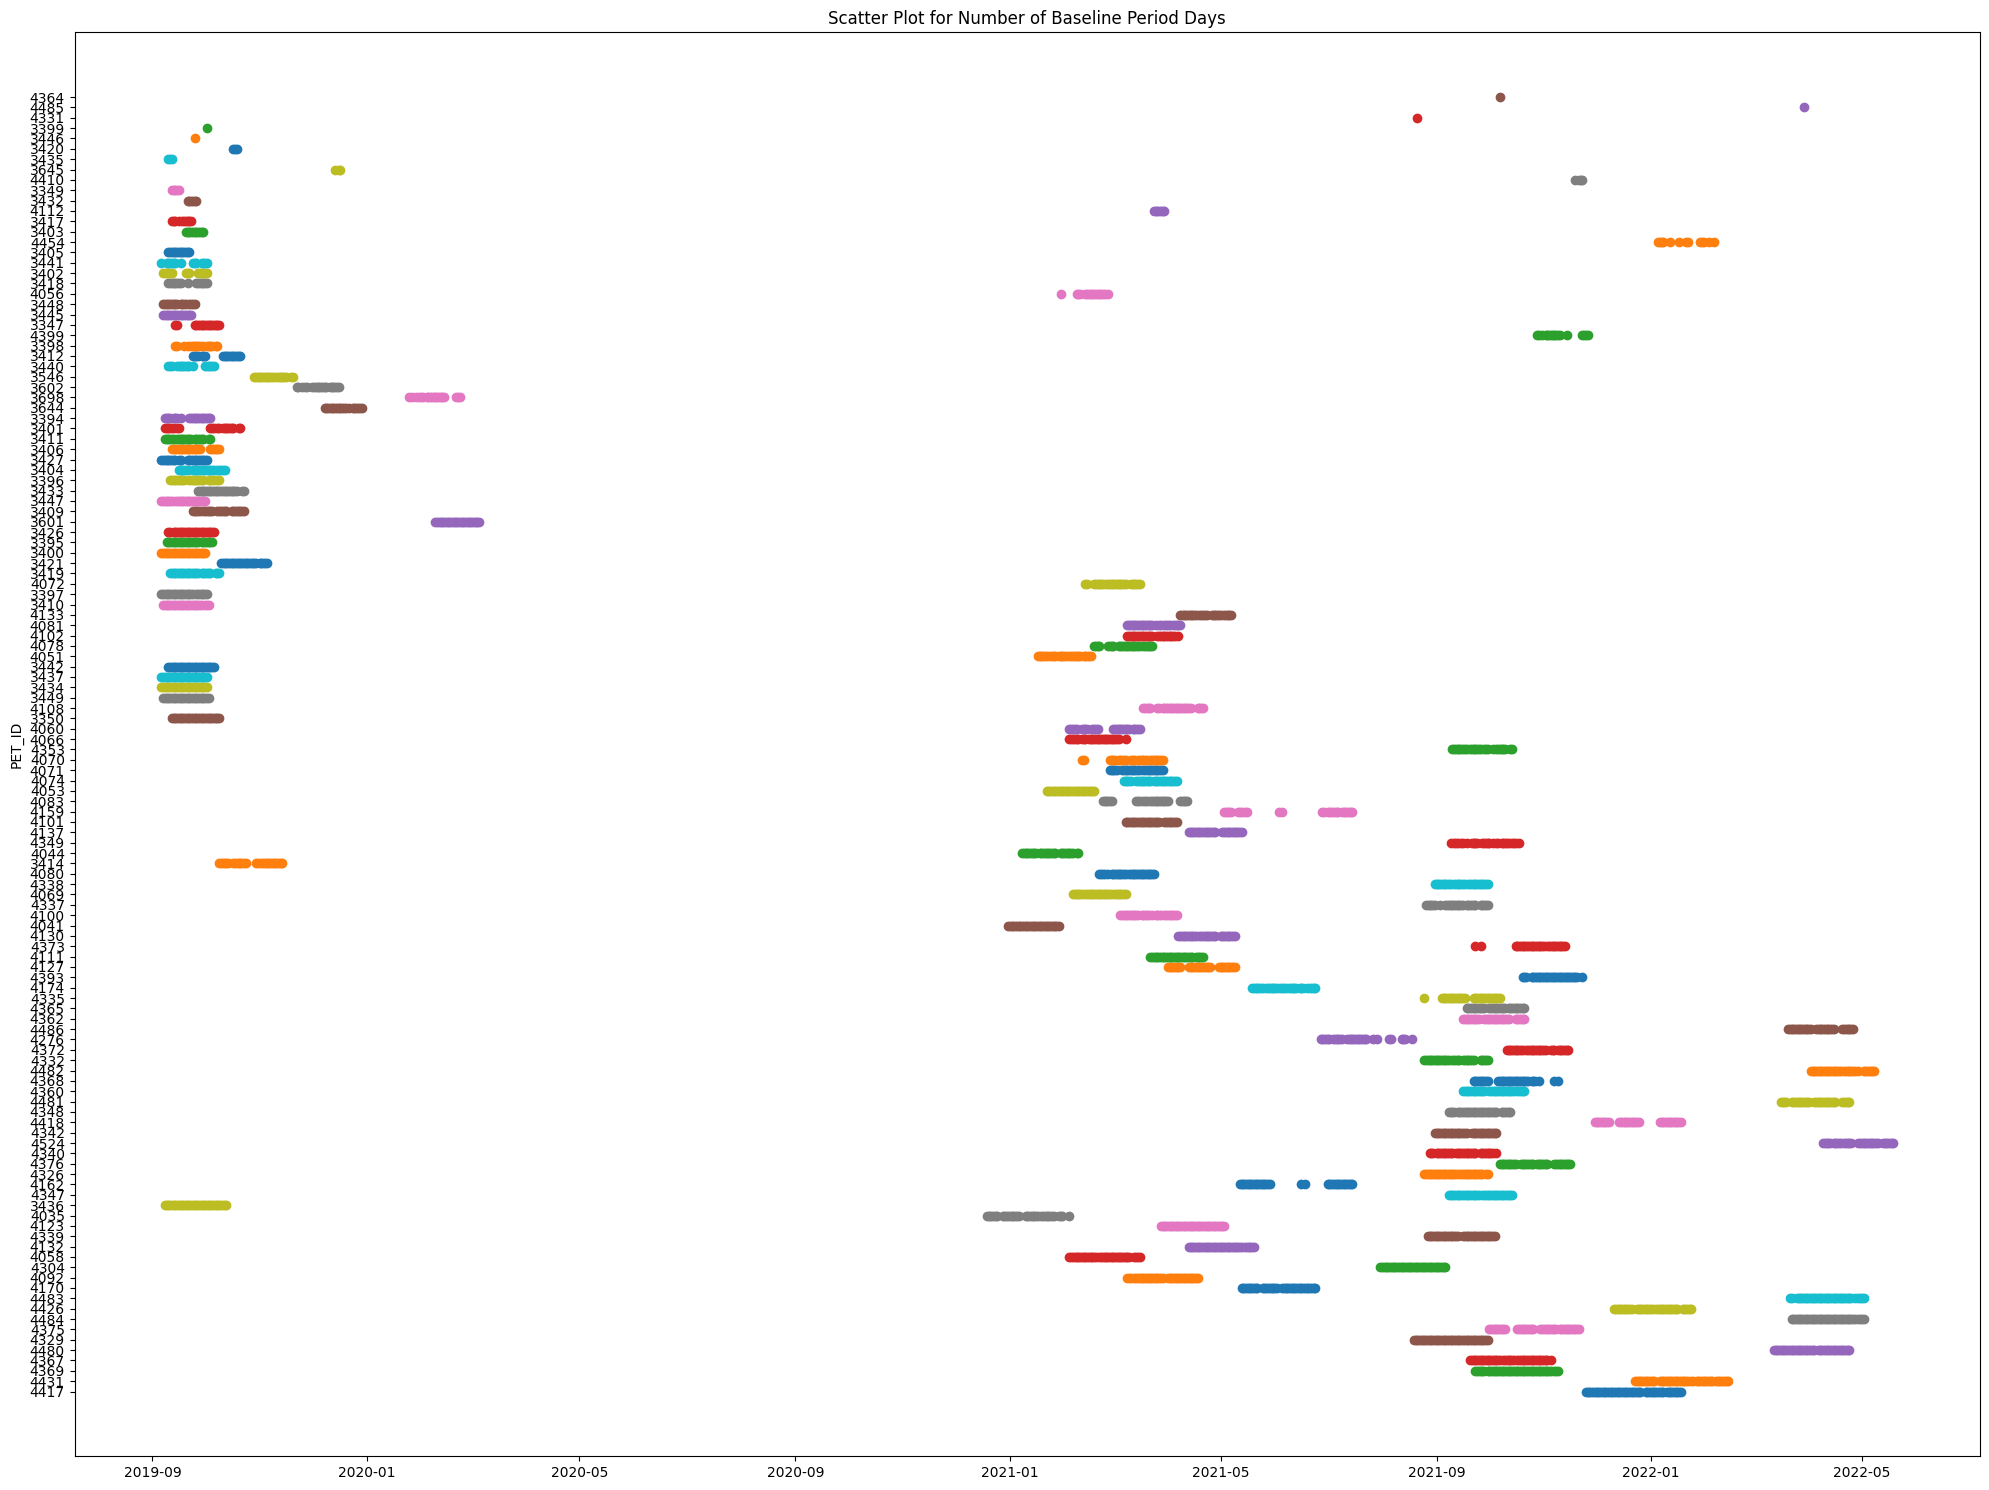

In [68]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_title('Scatter Plot for Number of Baseline Period Days')
ax.set_ylabel('PET_ID')

# Retrieve unique PET_ID values
unique_pet_ids = low_to_high_dates_baseline['PET_ID'].unique()

# Create a mapping between PET_ID and its y-axis position
pet_id_mapping = {pet_id: idx for idx, pet_id in enumerate(unique_pet_ids)}

# Plotting the data for each PET_ID
for pet_id in unique_pet_ids:
    pet_data = baseline[baseline['PET_ID'] == pet_id]
    y_position = pet_id_mapping[pet_id]
    ax.scatter(pet_data['DATE'].values, [y_position] * len(pet_data), label=str(pet_id))

# Set y-axis tick labels and positions
ax.set_yticks(range(len(unique_pet_ids)))
ax.set_yticklabels(unique_pet_ids)

plt.tight_layout()

plt.savefig('Scatter Plot for Number of Baseline Period Days.pdf')

In [69]:
low_to_high_dates_intervention=intervention.groupby(['PET_ID']).agg({'DATE':'nunique'})\
                    .sort_values(['DATE'],ascending=False).reset_index()

In [70]:
print(low_to_high_dates_intervention)

     PET_ID  DATE
0      4364   125
1      3449   113
2      3442   104
3      3437   104
4      3410   102
5      3427   101
6      3416    97
7      3347    96
8      3397    96
9      3426    95
10     3394    95
11     3350    94
12     3419    94
13     3395    94
14     3411    94
15     3436    93
16     3418    92
17     4111    91
18     4482    89
19     3404    88
20     3400    88
21     3440    88
22     4367    87
23     4081    87
24     4108    86
25     3441    86
26     4486    86
27     4123    85
28     4329    85
29     4170    85
30     4347    85
31     4365    85
32     4369    85
33     4159    84
34     4335    84
35     3546    83
36     4044    82
37     4133    81
38     3409    81
39     4340    80
40     4426    80
41     4080    79
42     3420    79
43     3406    79
44     4060    78
45     3414    78
46     4373    78
47     4102    77
48     4072    77
49     4078    76
50     4360    76
51     4362    76
52     4337    75
53     3447    75
54     441

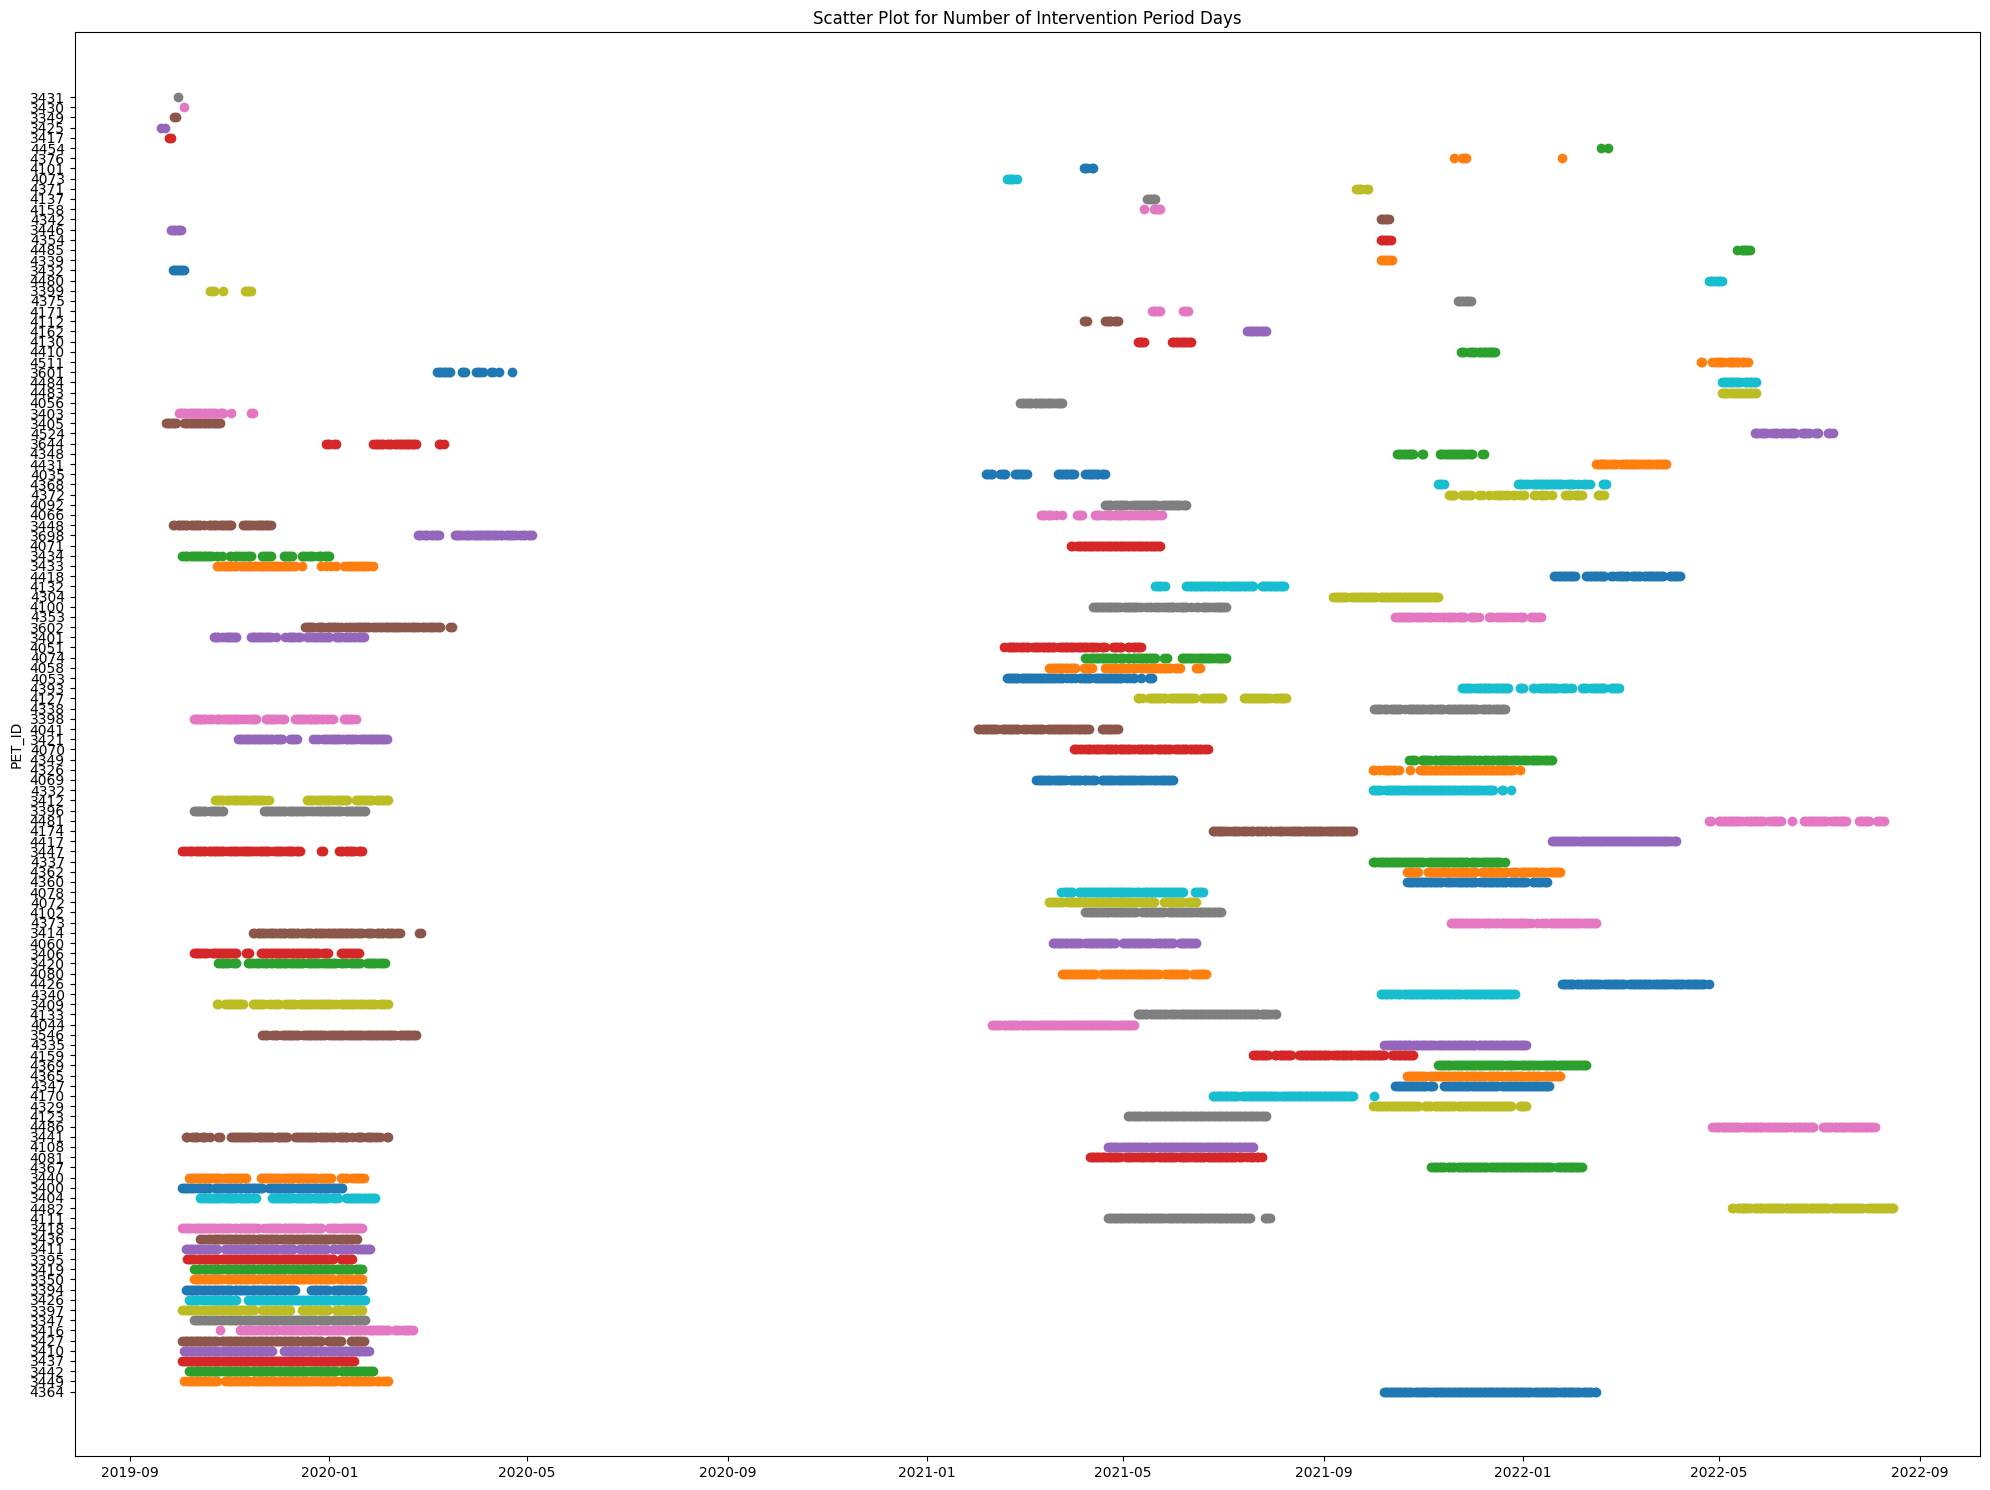

In [71]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_title('Scatter Plot for Number of Intervention Period Days')
ax.set_ylabel('PET_ID')

# Retrieve unique PET_ID values
unique_pet_ids = low_to_high_dates_intervention['PET_ID'].unique()

# Create a mapping between PET_ID and its y-axis position
pet_id_mapping = {pet_id: idx for idx, pet_id in enumerate(unique_pet_ids)}

# Plotting the data for each PET_ID
for pet_id in unique_pet_ids:
    pet_data = intervention[intervention['PET_ID'] == pet_id]
    y_position = pet_id_mapping[pet_id]
    ax.scatter(pet_data['DATE'].values, [y_position] * len(pet_data), label=str(pet_id))

# Set y-axis tick labels and positions
ax.set_yticks(range(len(unique_pet_ids)))
ax.set_yticklabels(unique_pet_ids)

plt.tight_layout()
plt.savefig('Scatter Plot for Number of Intervention Period Days.pdf')

# Descriptive statistics on Stuck accel time

In [72]:
final[['VAR1_TD_8_Q5_2', 'VAR2_TD_8_Q5_2', 'VAR3_TD_8_Q5_2', 'VAR4_TD_8_Q5_2']].rename(columns = activity_map).astype(float).describe().T

,count,mean,std,min,25%,50%,75%,max
Stuck AccelX,10851.0,2.672196,154.270235,0.0,0.0,0.0,0.0,14130.0
Stuck AccelY,10851.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Stuck AccelZ,10851.0,16.525482,179.833136,0.0,0.0,0.0,0.0,6455.0
Stuck AccelM,10851.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [73]:
# Stuck accel time per study group
stuck_columns = ['VAR1_TD_8_Q5_2', 'VAR2_TD_8_Q5_2', 'VAR3_TD_8_Q5_2', 'VAR4_TD_8_Q5_2']
sum_by_study_group = final.groupby('study_food')[stuck_columns].sum()

stuck_by_study_group = sum_by_study_group.rename(columns = activity_map) 

print(stuck_by_study_group)

            Stuck AccelX  Stuck AccelY  Stuck AccelZ  Stuck AccelM
study_food                                                        
Black                0.0           0.0       61469.0           0.0
None              6630.0           0.0       14242.0           0.0
Peach            22366.0           0.0      103607.0           0.0


In [74]:
# Stuck accel time per participant
sum_by_pet_id = final.groupby('PET_ID')[stuck_columns].sum()

stuck_by_pet_id = sum_by_pet_id.rename(columns = activity_map) 

print(stuck_by_pet_id)

        Stuck AccelX  Stuck AccelY  Stuck AccelZ  Stuck AccelM
PET_ID                                                        
3347             0.0           0.0         122.0           0.0
3349             0.0           0.0           0.0           0.0
3350             0.0           0.0           0.0           0.0
3394             0.0           0.0        2656.0           0.0
3395             0.0           0.0           0.0           0.0
3396             0.0           0.0        2305.0           0.0
3397             0.0           0.0           0.0           0.0
3398             0.0           0.0        5176.0           0.0
3399             0.0           0.0           0.0           0.0
3400             0.0           0.0           1.0           0.0
3401             0.0           0.0          93.0           0.0
3402             0.0           0.0        1286.0           0.0
3403             0.0           0.0           0.0           0.0
3404             0.0           0.0        3158.0       

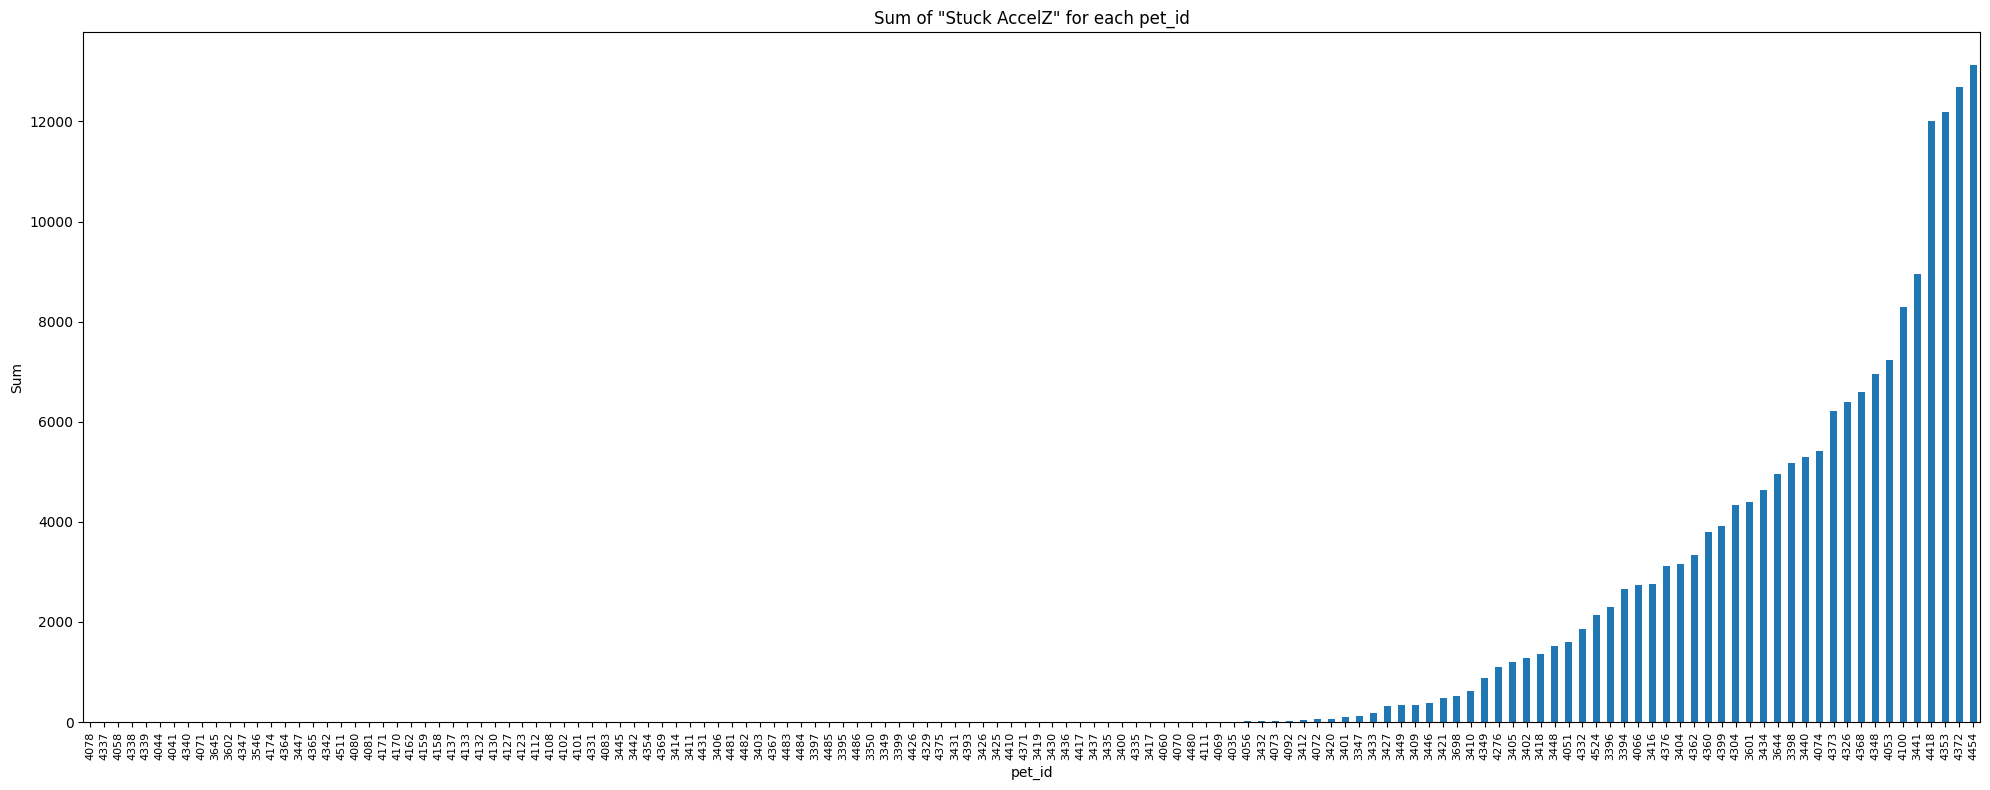

In [75]:
# Sort the DataFrame by 'Stuck AccelZ' in ascending order
sorted_stuck_by_pet_id = stuck_by_pet_id.sort_values(by='Stuck AccelZ')

# Create the plot
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the sorted data
sorted_stuck_by_pet_id['Stuck AccelZ'].plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('pet_id')
ax.set_ylabel('Sum')
ax.set_title('Sum of "Stuck AccelZ" for each pet_id')

# Set the x-axis tick labels
# Since the DataFrame is sorted, these labels will be in the corresponding sorted order
ax.set_xticklabels(sorted_stuck_by_pet_id.index, rotation=90, fontsize=8)

plt.tight_layout()

# Number of stuck devices

In [76]:
# Stuck devices are devices having stuck Accel values
stuck_data = final[(final['VAR1_TD_8_Q5_2'] > 0) |(final['VAR2_TD_8_Q5_2'] > 0) | 
                          (final['VAR3_TD_8_Q5_2'] > 0) | (final['VAR4_TD_8_Q5_2'] > 0)]
stuck_data['DEVICE_ID'].nunique()

85

In [77]:
stuck_data.groupby('study_food')['DEVICE_ID'].nunique()

study_food
Black    30
None     12
Peach    43
Name: DEVICE_ID, dtype: int64

In [78]:
stuck_device_per_participant = stuck_data.groupby('PET_ID')['DEVICE_ID'].nunique()

stuck_device_per_participant

PET_ID
3347    2
3394    2
3396    2
3398    3
3400    1
3401    1
3402    2
3404    1
3405    1
3409    1
3410    2
3412    1
3416    2
3417    1
3418    2
3420    1
3421    1
3427    2
3432    1
3433    2
3434    3
3440    3
3441    4
3446    1
3448    1
3449    1
3601    1
3644    1
3698    2
4035    1
4051    1
4053    1
4056    1
4060    1
4066    1
4069    1
4070    1
4072    1
4073    1
4074    2
4092    1
4100    1
4111    1
4276    1
4304    1
4326    2
4332    1
4335    1
4348    2
4349    1
4353    1
4360    1
4362    1
4368    1
4372    1
4373    2
4376    1
4399    1
4418    1
4454    1
4480    1
4524    1
Name: DEVICE_ID, dtype: int64

([<matplotlib.axis.XTick at 0x7fcd11d91f10>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

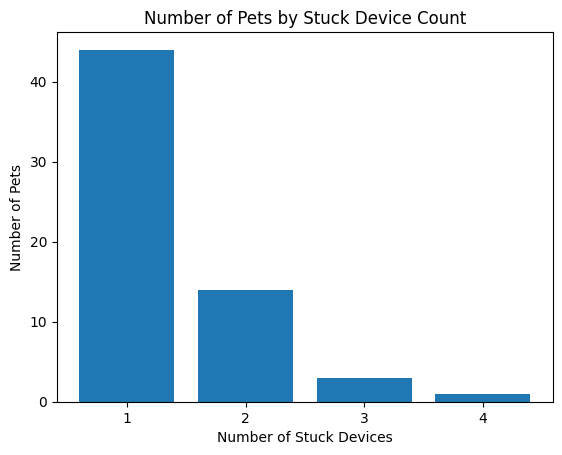

In [79]:
stuck_device_pet_counts = stuck_device_per_participant.value_counts().sort_index()

plt.bar(stuck_device_pet_counts.index.astype(int), stuck_device_pet_counts.values)
plt.xlabel('Number of Stuck Devices')
plt.ylabel('Number of Pets')
plt.title('Number of Pets by Stuck Device Count')

plt.xticks(list(map(int, stuck_device_pet_counts.index)))

# b) Data quality evaluation

In [80]:
day = 'NORMALIZED_QUALIFYING_STUDY_DAY_NEW'
# Create a new column 'period' 
final['period'] = 'Other'

# Set 'period' based on the conditions for final
final.loc[final[day] < 0, 'period'] = 'Baseline'
final.loc[final[day] >= 0, 'period'] = 'Treatment'

data['period'] = 'Other'

# Set 'period' based o the conditions final the whole dataset
data.loc[data[day] < 0, 'period'] = 'Baseline'
data.loc[data[day] >= 0, 'period'] = 'Treatment'

In [81]:
data[data['period'] == 'Baseline']['IS_QUALIFIED_NEW'].value_counts()

YES    3304
Name: IS_QUALIFIED_NEW, dtype: int64

In [82]:
data[data['period'] == 'Treatment']['IS_QUALIFIED_NEW'].value_counts()

YES    7547
Name: IS_QUALIFIED_NEW, dtype: int64

In [83]:
data[data['period'] == 'Other']['IS_QUALIFIED_NEW'].value_counts()

NO    3119
Name: IS_QUALIFIED_NEW, dtype: int64

In [84]:
# i. Total number of wearable data days
total_data_days = data.groupby('period')['DATE'].count()

In [85]:
total_data_days

period
Baseline     3304
Other        3119
Treatment    7547
Name: DATE, dtype: int64

In [86]:
total_qualified_data_days = final[final['IS_QUALIFIED_NEW'] == 'YES'].groupby('period')['DATE'].count()

In [87]:
total_qualified_data_days

period
Baseline     3304
Treatment    7547
Name: DATE, dtype: int64

In [88]:
total_nonqualified_data_days = data[data['IS_QUALIFIED_NEW'] == 'NO'].groupby('period')['DATE'].count()

In [89]:
total_nonqualified_data_days

period
Other    3119
Name: DATE, dtype: int64

In [90]:
itt = data[data['wearables_itt'] == True]
pp = data[data['wearables_pp'] == True]

In [91]:
pp['PET_ID'].unique()

array([3347, 3350, 3400, 3410, 3411, 3414, 3419, 3427, 3437, 3440, 3442,
       3449, 3546, 4044, 4053, 4069, 4070, 4072, 4078, 4080, 4102, 4108,
       4133, 4170, 4174, 4326, 4329, 4332, 4335, 4340, 4347, 4349, 4360,
       4362, 4365, 4367, 4369, 4373, 4393, 4417, 4426, 4482])

In [92]:
itt.shape

(13951, 694)

In [93]:
pp.shape

(5594, 694)

In [94]:
# i. Total number of wearable data days
total_data_days_itt = itt['DATE'].count()
total_data_days_pp = pp['DATE'].count()

In [95]:
total_data_days_itt

13951

In [96]:
total_data_days_pp

5594

In [97]:
total_qualified_data_days_itt = itt[itt['IS_QUALIFIED_NEW'] == 'YES']['DATE'].count()
total_qualified_data_days_pp = pp[pp['IS_QUALIFIED_NEW'] == 'YES']['DATE'].count()

In [98]:
total_qualified_data_days_itt

10834

In [99]:
total_qualified_data_days_pp

4788

In [100]:
percentage_itt = 100*total_qualified_data_days_itt / total_data_days_itt
percentage_pp = 100*total_qualified_data_days_pp / total_data_days_pp

In [101]:
percentage_itt

77.65751559028027

In [102]:
percentage_pp

85.5917053986414

In [103]:
total_nonqualified_data_days_itt = itt[itt['IS_QUALIFIED_NEW'] == 'NO']['DATE'].count()
total_nonqualified_data_days_pp = pp[pp['IS_QUALIFIED_NEW'] == 'NO']['DATE'].count()

In [104]:
total_nonqualified_data_days_itt

3117

In [105]:
total_nonqualified_data_days_pp

806

In [106]:
percentage_itt_non = 100*total_nonqualified_data_days_itt / total_data_days_itt
percentage_pp_non = 100*total_nonqualified_data_days_pp / total_data_days_pp

In [107]:
percentage_itt_non

22.342484409719734

In [108]:
percentage_pp_non

14.408294601358598

In [109]:
# Filter the DataFrame to include only non-empty values in 'DAILYDATAQUALITYINDREASON'
reason = data.loc[data['DAILYDATAQUALITYINDREASON'] != '', :].copy()

# Mapping the original categories to numerical values and shortened names
category_mapping = {
    'Duration less than 20 hours': 'Duration < 20hrs',
    'Single Sleep event over 6 hours found': 'Single Sleep > 6hrs',
    'Duration less than 20 hours and Single Sleep event over 6 hours found': 'Duration < 20hrs & Single Sleep > 6hrs'
}
reason['DAILYDATAQUALITYINDREASON_short'] = reason['DAILYDATAQUALITYINDREASON'].map(category_mapping)

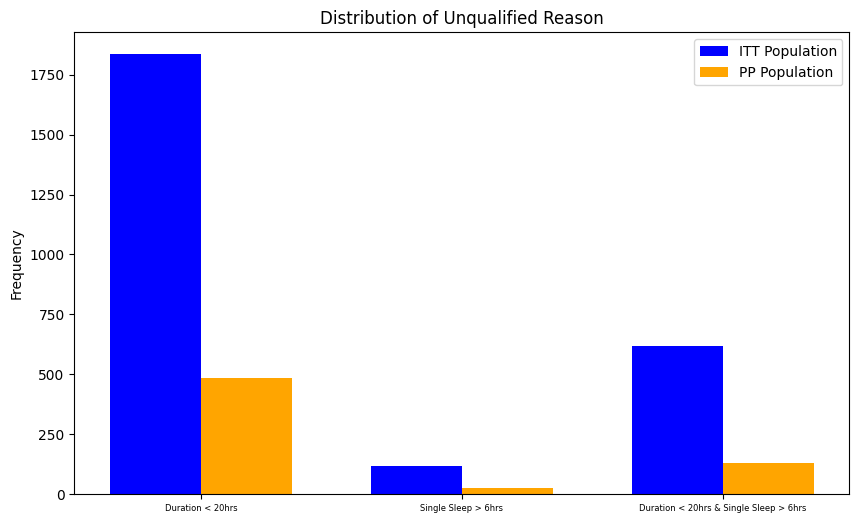

In [110]:
data_itt = reason[reason['wearables_itt'] == True]
data_pp = reason[reason['wearables_pp'] == True]

# Get unique values and their counts for each group
numeric_values_0, counts_0 = np.unique(data_itt['DAILYDATAQUALITYINDREASON_short'], return_counts=True)
numeric_values_1, counts_1 = np.unique(data_pp['DAILYDATAQUALITYINDREASON_short'], return_counts=True)

category_order = ['Duration < 20hrs', 'Single Sleep > 6hrs', 'Duration < 20hrs & Single Sleep > 6hrs']

numeric_values_ordered_0 = [val for val in category_order if val in numeric_values_0]
numeric_values_ordered_1 = [val for val in category_order if val in numeric_values_1]

# Plotting the distributions for each group
colors = ['blue', 'orange', 'green']  # Specify colors for each category
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(len(numeric_values_ordered_0)), counts_0, width, color=colors[0], label='ITT Population')
ax.bar(np.arange(len(numeric_values_ordered_1)) + width, counts_1, width, color=colors[1], label='PP Population')

# Set x-axis tick labels and positions
ax.set_xticks(np.arange(len(numeric_values_ordered_0)) + width / 2)
ax.set_xticklabels(numeric_values_ordered_0, fontsize=6)

ax.set_ylabel('Frequency')
ax.set_title('Distribution of Unqualified Reason')
ax.legend()

In [111]:
final[stuck_columns].head()

,VAR1_TD_8_Q5_2,VAR2_TD_8_Q5_2,VAR3_TD_8_Q5_2,VAR4_TD_8_Q5_2
4,0.0,0.0,121.0,0.0
5,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0


In [112]:
min_stuck_map = {
    'VAR1_TD_8_Q5_2_minutes': 'Stuck AccelX minutes', 
    'VAR2_TD_8_Q5_2_minutes': 'Stuck AccelY minutes', 
    'VAR3_TD_8_Q5_2_minutes': 'Stuck AccelZ minutes',
    'VAR4_TD_8_Q5_2_minutes': 'Stuck AccelM minutes'
}
for column in stuck_columns:
    final[column + '_minutes'] = final[column] / 60

stuck_min = final[['wearables_itt', 'wearables_pp', 'VAR1_TD_8_Q5_2_minutes', 'VAR2_TD_8_Q5_2_minutes', 'VAR3_TD_8_Q5_2_minutes', 'VAR4_TD_8_Q5_2_minutes']].copy()
stuck_min.rename(columns=min_stuck_map, inplace=True)

In [113]:
stuck_min_itt = stuck_min[stuck_min['wearables_itt'] == True].copy()

In [114]:
stuck_min_pp = stuck_min[stuck_min['wearables_pp'] == True].copy()

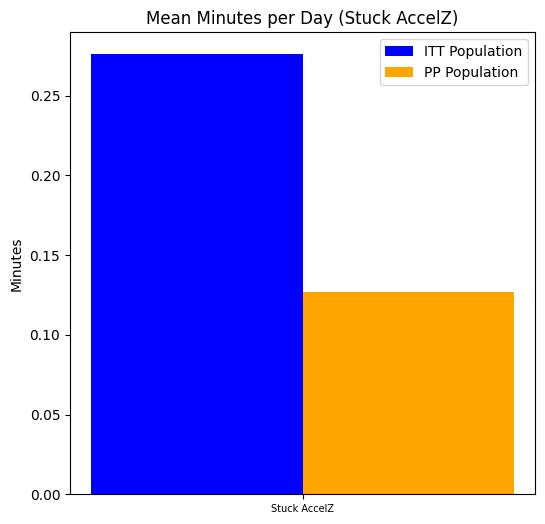

In [115]:
# Calculate the mean values for each dataset
mean_values_itt = stuck_min_itt['Stuck AccelZ minutes'].mean()
mean_values_pp = stuck_min_pp['Stuck AccelZ minutes'].mean()

# Set the colors for each dataset
colors = ['blue', 'orange']

# Plotting the mean values for 'Stuck AccelZ minutes'
fig, ax = plt.subplots(figsize=(6, 6))

x = np.arange(1)
width = 0.2

ax.bar(x, mean_values_itt, width, color=colors[0], label='ITT Population')
ax.bar(x + width, mean_values_pp, width, color=colors[1], label='PP Population')

# Set x-axis tick labels and positions
ax.set_xticks(x + width / 2)
ax.set_xticklabels(['Stuck AccelZ'], fontsize=7)

ax.set_ylabel('Minutes')
ax.set_title('Mean Minutes per Day (Stuck AccelZ)')
ax.legend()

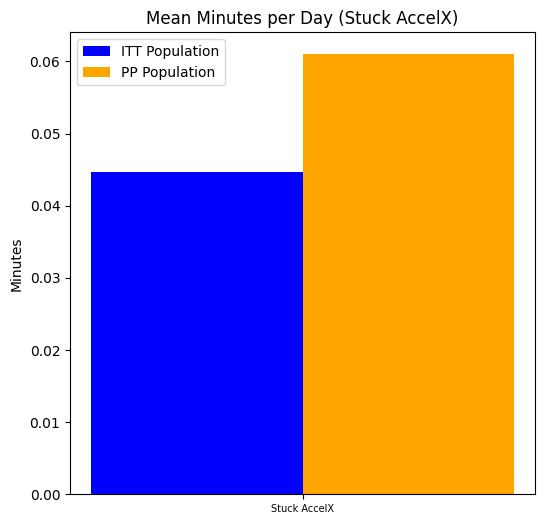

In [116]:
mean_values_itt = stuck_min_itt['Stuck AccelX minutes'].mean()
mean_values_pp = stuck_min_pp['Stuck AccelX minutes'].mean()

# Set the colors for each dataset
colors = ['blue', 'orange']

# Plotting the mean values for 'Stuck AccelZ minutes'
fig, ax = plt.subplots(figsize=(6, 6))

x = np.arange(1)
width = 0.2

ax.bar(x, mean_values_itt, width, color=colors[0], label='ITT Population')
ax.bar(x + width, mean_values_pp, width, color=colors[1], label='PP Population')

# Set x-axis tick labels and positions
ax.set_xticks(x + width / 2)
ax.set_xticklabels(['Stuck AccelX'], fontsize=7)

ax.set_ylabel('Minutes')
ax.set_title('Mean Minutes per Day (Stuck AccelX)')
ax.legend()

# c) Anomaly detection and outlier analysis

## Using excessive_running as indicator

## Using the +/- 3 std to detect the outliers

In [145]:
data['EXCESSIVE_RUNNING'].unique()

array([0, 1])

In [118]:
final['CONSECUTIVE_RUNNING'].unique()

array([0])

In [146]:
# Select the columns and rename them using activity_map
activity_columns = ['VAR_TD_1_Q5_2', 'VAR_TD_3_Q5_2', 'VAR_TD_5_Q5_2', 'VAR_TD_4_Q5_2', 'VAR_TD_12_Q5_2', 'VAR_TD_2_Q5_2']

activity = ['resting', 'running', 'scratching', 'shaking', 'sleeping', 'walking']

excessive_running_0_data = data.loc[data['EXCESSIVE_RUNNING'] == 0, ['VAR_TD_1_Q5_2',
                                                                                 'VAR_TD_3_Q5_2', 'VAR_TD_5_Q5_2', 'VAR_TD_4_Q5_2', 'VAR_TD_12_Q5_2', 'VAR_TD_2_Q5_2']]

excessive_running_1_data = data.loc[data['EXCESSIVE_RUNNING'] == 1, ['VAR_TD_1_Q5_2',
                                                                                 'VAR_TD_3_Q5_2', 'VAR_TD_5_Q5_2', 'VAR_TD_4_Q5_2', 'VAR_TD_12_Q5_2', 'VAR_TD_2_Q5_2']]

In [147]:
# Rename and Transform the units into minutes for activity
excessive_running_0_data.rename(columns=activity_map, inplace=True)
excessive_running_0_data[activity] = excessive_running_0_data[activity] / 60

excessive_running_1_data.rename(columns=activity_map, inplace=True)
excessive_running_1_data[activity] = excessive_running_1_data[activity] / 60

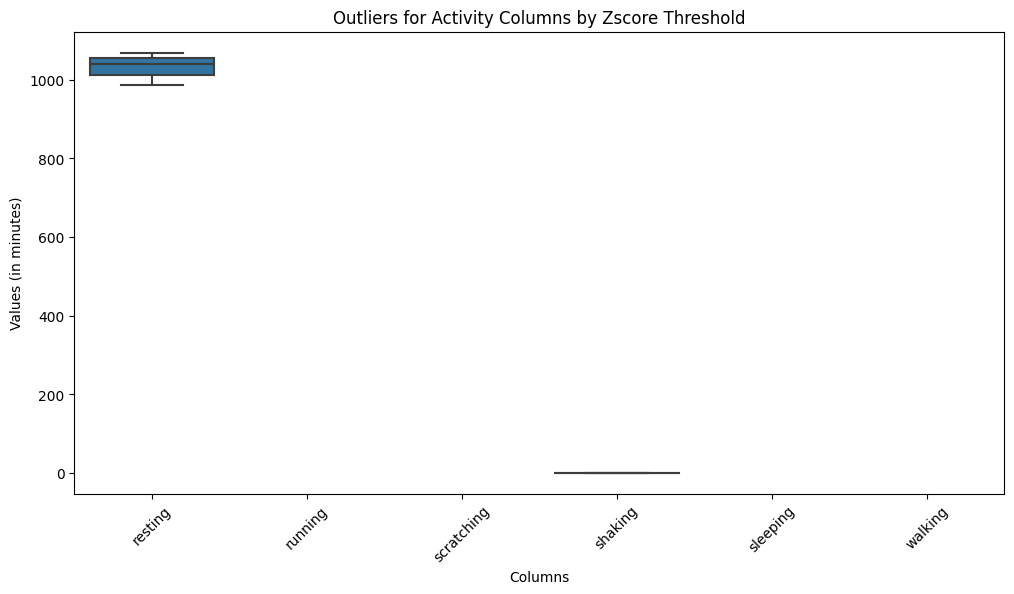

In [ ]:
# Create a new DataFrame to store the outlier values
outlier_df1 = pd.DataFrame()

# Iterate over activity columns
for col in activity:
    col_mean = excessive_running_0_data[col].mean()
    col_std = excessive_running_0_data[col].std()
    zscore = (excessive_running_0_data[col] - col_mean) / col_std
# Detect outliers outside +/- 3 std of zscore
    outlier_col1 = excessive_running_0_data[zscore.abs() > 3][col]
    outlier_df1[col] = outlier_col1

# Create boxplot for all columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=outlier_df1)
plt.title("Outliers for Activity Columns by Zscore Threshold")
plt.xlabel("Columns")
plt.ylabel("Values (in minutes)")
plt.xticks(rotation=45)
plt.show()

## Unsupervised Outlier Detection

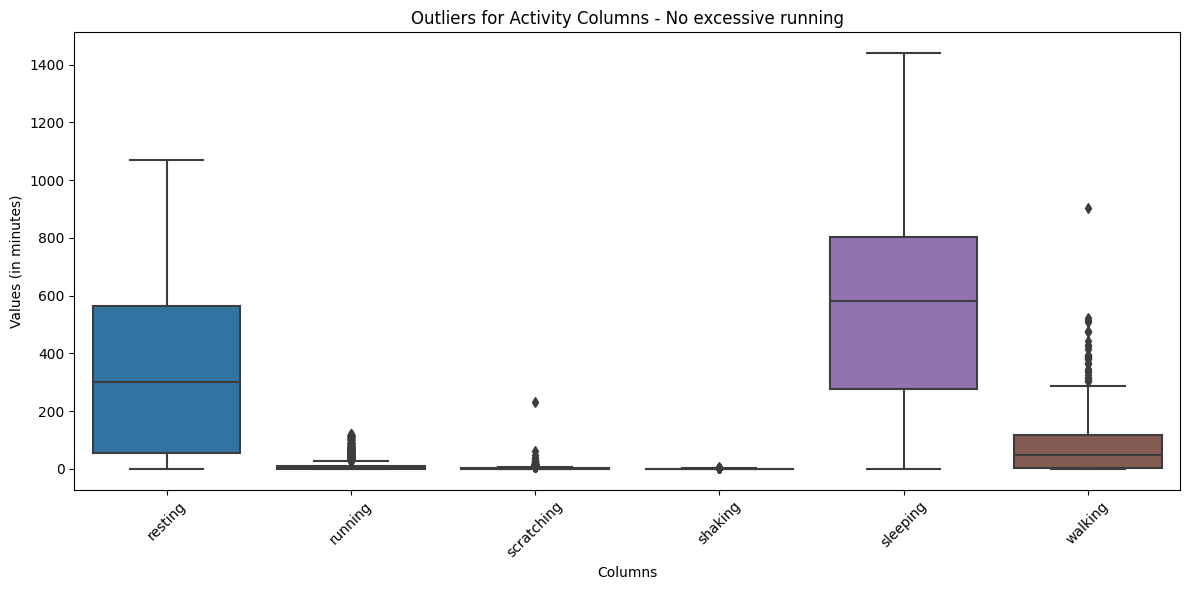

In [149]:
# Select the activity columns from excessive_running_0_data
activity_data = excessive_running_0_data[activity]

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the activity data
isolation_forest.fit(activity_data)

# Predict outliers using the trained model
outlier_predictions = isolation_forest.predict(activity_data)

# Create a mask to filter outlier instances
outlier_mask = outlier_predictions == -1

# Filter the activity data to get the outlier instances
outlier_instances = activity_data[outlier_mask]

# Visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=outlier_instances)
plt.title("Outliers for Activity Columns - No excessive running")
plt.xlabel("Columns")
plt.ylabel("Values (in minutes)")
plt.xticks(rotation=45)
plt.tight_layout()

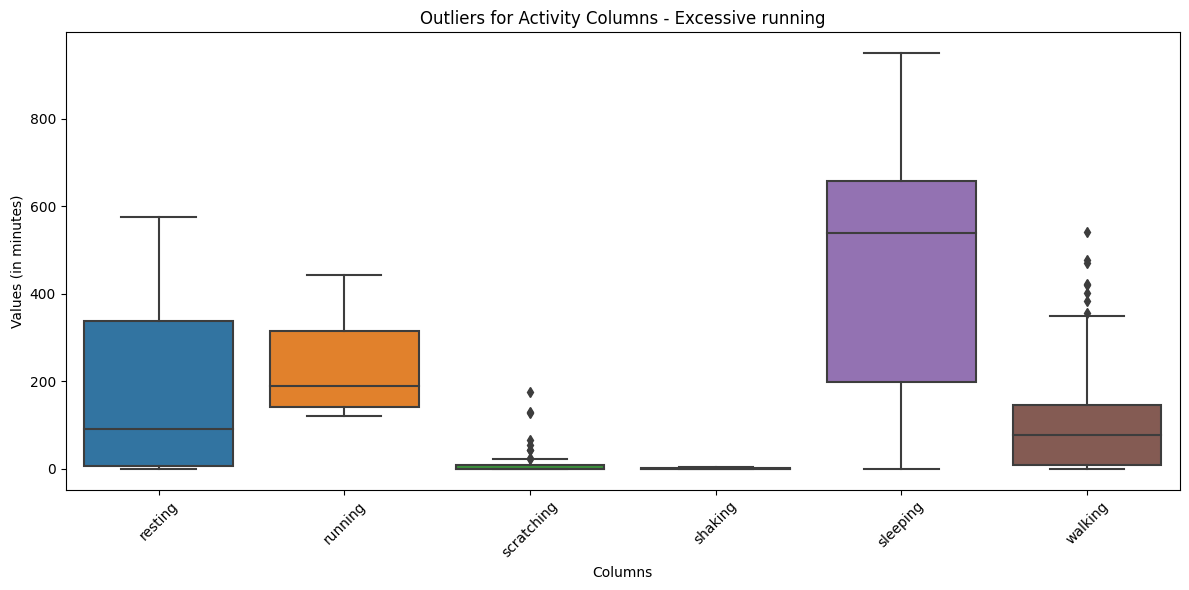

In [151]:
# Select the activity columns from excessive_running_1_data
activity_data = excessive_running_1_data[activity]

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the activity data
isolation_forest.fit(activity_data)

# Predict outliers using the trained model
outlier_predictions = isolation_forest.predict(activity_data)

# Create a mask to filter outlier instances
outlier_mask = outlier_predictions == -1

# Filter the activity data to get the outlier instances
outlier_instances = activity_data[outlier_mask]

# Visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=outlier_instances)
plt.title("Outliers for Activity Columns - Excessive running")
plt.xlabel("Columns")
plt.ylabel("Values (in minutes)")
plt.xticks(rotation=45)
plt.tight_layout()

In [123]:
columns = stuck_columns + ['PET_ID']
 
df1 = final[columns].copy()
df1.loc[:, stuck_columns] = df1[stuck_columns] / 60
df1.rename(columns = activity_map, inplace=True)

In [124]:
df2 = data.loc[data['IS_QUALIFIED_NEW'] == 'NO', columns]
df2.loc[:, stuck_columns] = df2[stuck_columns] / 60
df2.rename(columns = activity_map, inplace=True)

Text(0, 0.5, 'Frequency')

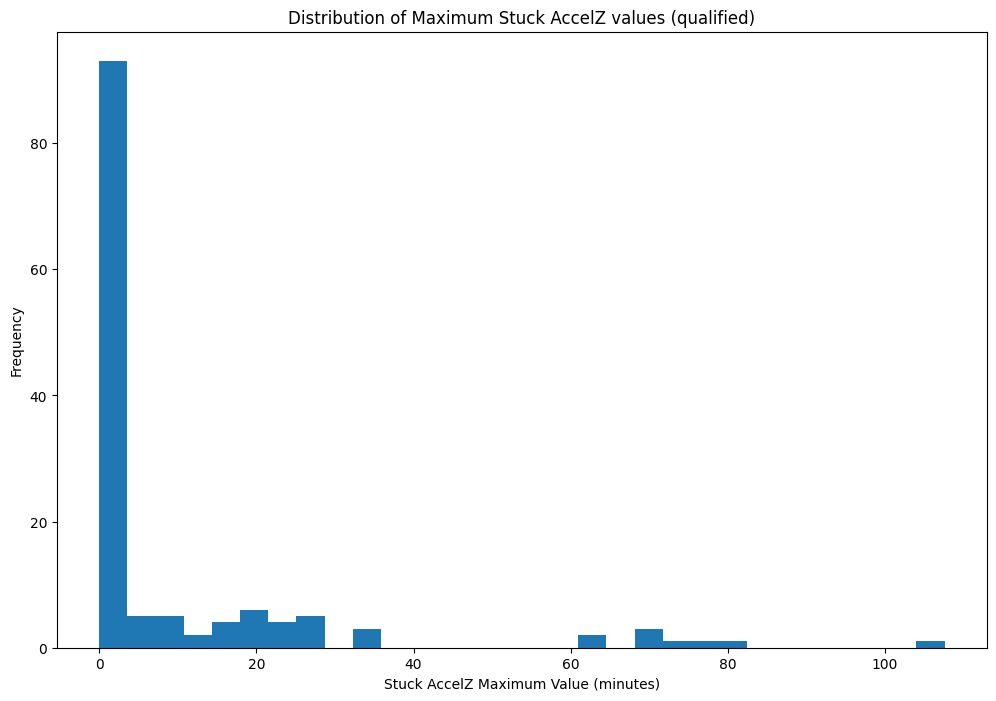

In [125]:
max_values = df1.groupby('PET_ID')[['Stuck AccelZ']].max()

plt.figure(figsize=(12, 8))
plt.hist(max_values['Stuck AccelZ'], bins=30)
plt.title('Distribution of Maximum Stuck AccelZ values (qualified)')
plt.xlabel('Stuck AccelZ Maximum Value (minutes)')
plt.ylabel('Frequency')



Text(0.5, 1.0, 'Box plot of Stuck AccelZ Maximum Values by Pet ID (qualified)')

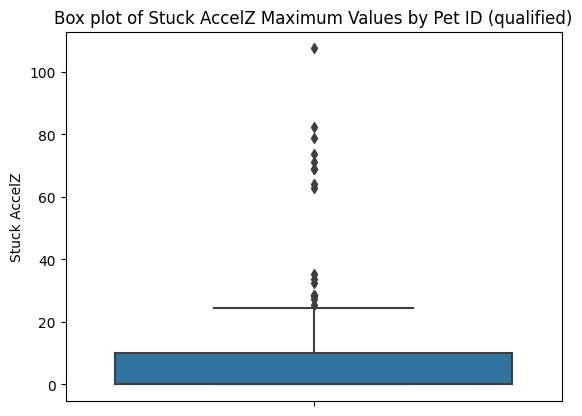

In [153]:
from scipy.stats import zscore
# Calculate Z-Scores
max_values['Z-Score'] = zscore(max_values['Stuck AccelZ'])

# Identify Outliers
max_values['outlier'] = max_values['Z-Score'].apply(lambda x: abs(x) > 3)

# Boxplot
sns.boxplot(y=max_values['Stuck AccelZ'], orient='v')

# Add outliers on the boxplot
sns.scatterplot(data=max_values[max_values['outlier']], y=max_values[max_values['outlier']]['Stuck AccelZ'], 
                color='red')

plt.title('Box plot of Stuck AccelZ Maximum Values by Pet ID (qualified)')

In [154]:
filtered_sorted_values = max_values[max_values['Stuck AccelZ']>100].sort_values(by='Stuck AccelZ', ascending=False)
filtered_sorted_values[['Stuck AccelZ']]

,Stuck AccelZ
PET_ID,
4353,107.583333


Text(0, 0.5, 'Frequency')

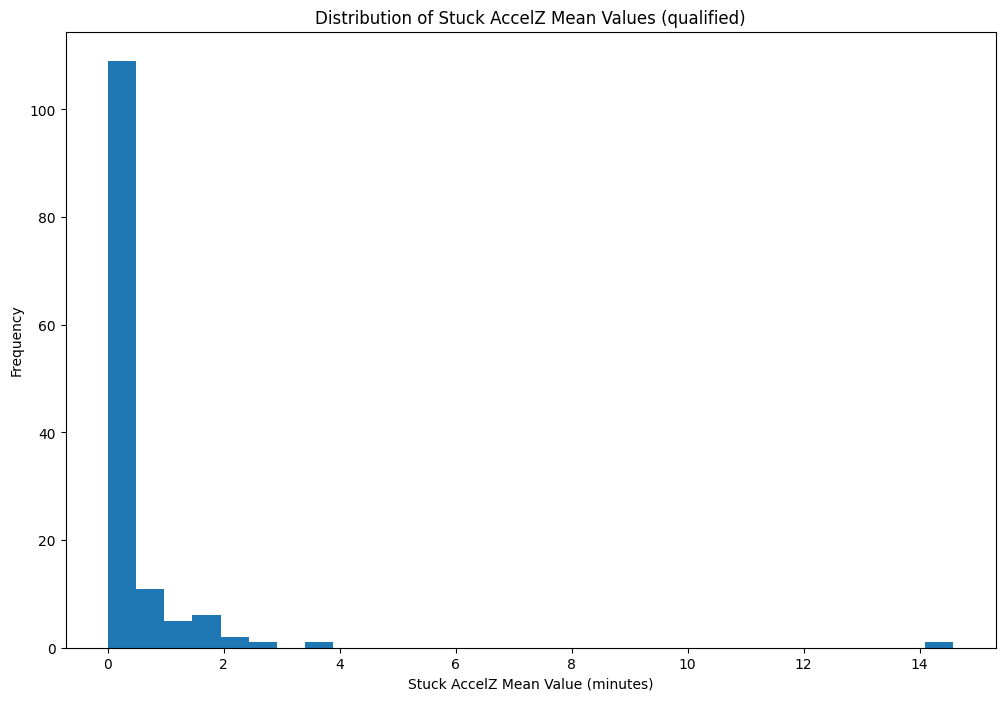

In [128]:
mean_values = df1.groupby('PET_ID')[['Stuck AccelZ']].mean()

plt.figure(figsize=(12, 8))
plt.hist(mean_values['Stuck AccelZ'], bins=30)
plt.title('Distribution of Stuck AccelZ Mean Values (qualified)')
plt.xlabel('Stuck AccelZ Mean Value (minutes)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Box plot of Stuck AccelZ Mean Values by Pet ID (qualified)')

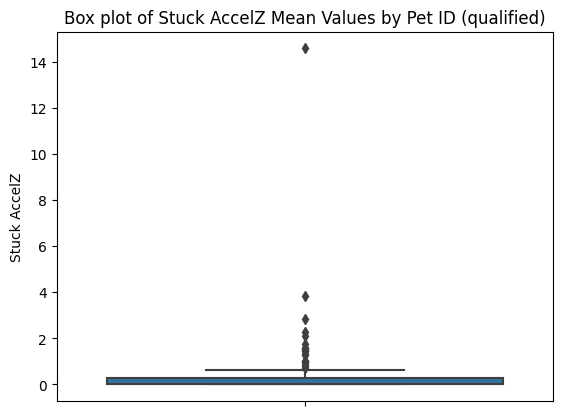

In [129]:
# Calculate Z-Scores
mean_values['Z-Score'] = zscore(mean_values['Stuck AccelZ'])

# Identify Outliers
mean_values['outlier'] = mean_values['Z-Score'].apply(lambda x: abs(x) > 3)

# Boxplot
sns.boxplot(y=mean_values['Stuck AccelZ'], orient='v')

# Add outliers on the boxplot
sns.scatterplot(data=mean_values[mean_values['outlier']], y=mean_values[mean_values['outlier']]['Stuck AccelZ'], 
                color='red',  facecolor='red')

plt.title('Box plot of Stuck AccelZ Mean Values by Pet ID (qualified)')

In [130]:
mean_values[mean_values['Stuck AccelZ']>10]

,Stuck AccelZ,Z-Score,outlier
PET_ID,,,
4454,14.583333,10.391894,True


Text(0, 0.5, 'Frequency')

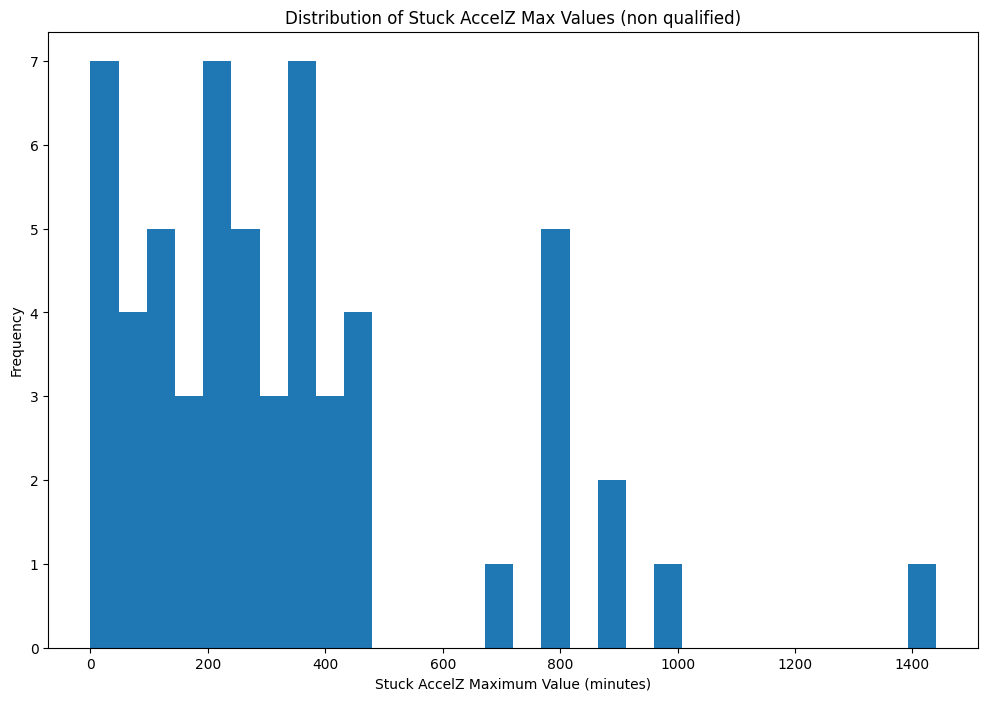

In [131]:
max_values2 = df2.groupby('PET_ID')[['Stuck AccelZ']].max()

plt.figure(figsize=(12, 8))
plt.hist(max_values2['Stuck AccelZ'], bins=30)
plt.title('Distribution of Stuck AccelZ Max Values (non qualified)')
plt.xlabel('Stuck AccelZ Maximum Value (minutes)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Box plot of Stuck AccelZ Maximum Values by Pet ID (non qualified)')

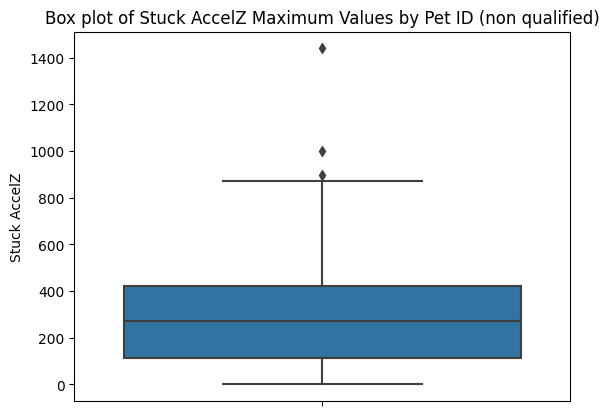

In [132]:
# Calculate Z-Scores
max_values2['Z-Score'] = zscore(max_values2['Stuck AccelZ'])

# Identify Outliers
max_values2['outlier'] = max_values2['Z-Score'].apply(lambda x: abs(x) > 3)

# Boxplot
sns.boxplot(y=max_values2['Stuck AccelZ'], orient='v')

# Add outliers on the boxplot
sns.scatterplot(data=max_values2[max_values2['outlier']], y=max_values2[max_values2['outlier']]['Stuck AccelZ'], 
                color='red', label='outliers')

plt.title('Box plot of Stuck AccelZ Maximum Values by Pet ID (non qualified)')

Text(0, 0.5, 'Frequency')

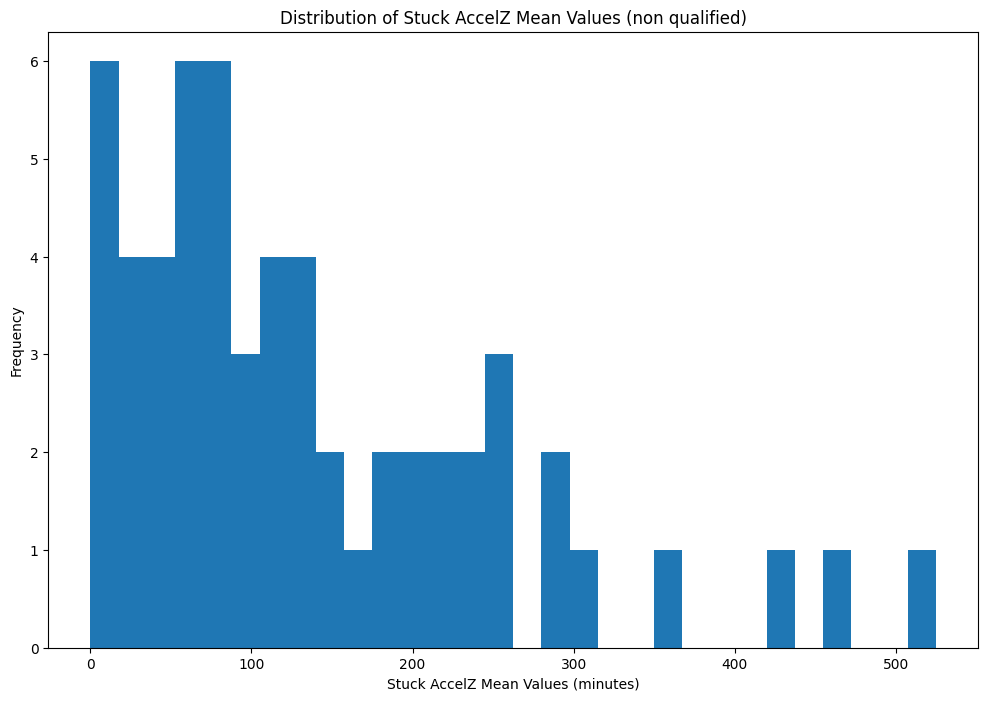

In [133]:
mean_values2 = df2.groupby('PET_ID')[['Stuck AccelZ']].mean()

plt.figure(figsize=(12, 8))
plt.hist(mean_values2['Stuck AccelZ'], bins=30)
plt.title('Distribution of Stuck AccelZ Mean Values (non qualified)')
plt.xlabel('Stuck AccelZ Mean Values (minutes)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Box plot of Stuck AccelZ Mean Values by Pet ID (non qualified)')

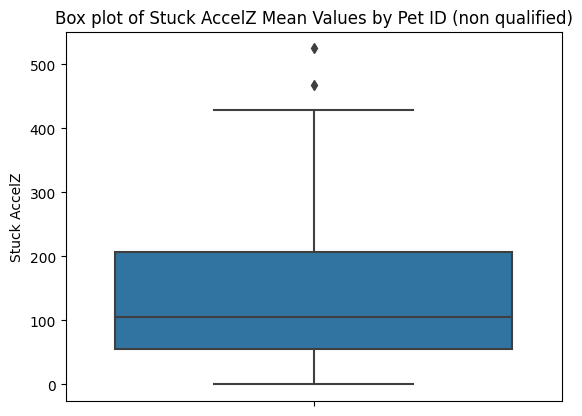

In [134]:
# Calculate Z-Scores
mean_values2['Z-Score'] = zscore(mean_values2['Stuck AccelZ'])

# Identify Outliers
mean_values2['outlier'] = mean_values2['Z-Score'].apply(lambda x: abs(x) > 3)

# Boxplot
sns.boxplot(y=mean_values2['Stuck AccelZ'], orient='v')

# Add outliers on the boxplot
sns.scatterplot(data=mean_values2[mean_values2['outlier']], y=mean_values2[mean_values2['outlier']]['Stuck AccelZ'], 
                color='red',  facecolor='red')

plt.title('Box plot of Stuck AccelZ Mean Values by Pet ID (non qualified)')

In [135]:
mean_values2.loc[mean_values2['Stuck AccelZ'] > 300, 'Stuck AccelZ']

PET_ID
4056    467.508333
4368    428.818817
4376    524.930928
4454    314.219146
4481    365.166667
Name: Stuck AccelZ, dtype: float64

In [136]:
stuck_data = data[stuck_columns].rename(columns = activity_map)
# Fill out the NaN as 0
stuck_data.fillna(0, inplace=True)
stuck_data = stuck_data / 60
stuck_data.head()

,Stuck AccelX,Stuck AccelY,Stuck AccelZ,Stuck AccelM
0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.066667,0.0
2,0.0,0.0,246.516667,0.0
3,0.0,0.0,278.500000,0.0
4,0.0,0.0,2.016667,0.0


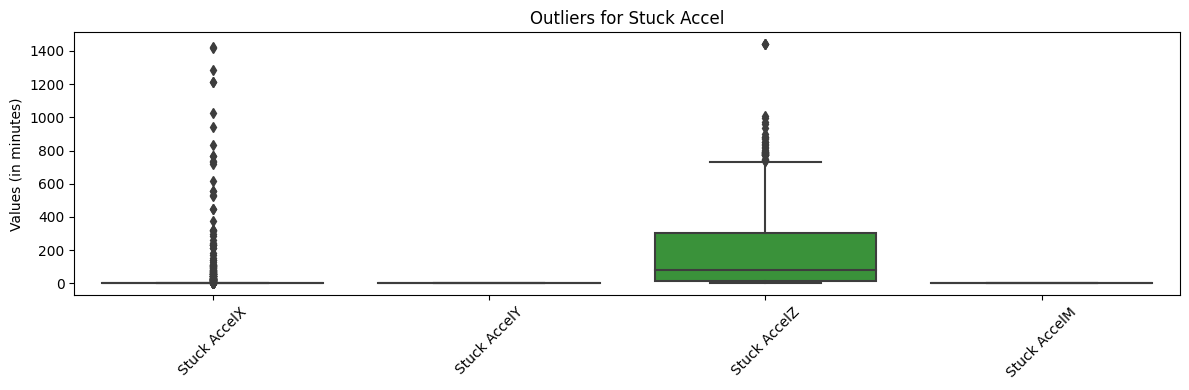

In [137]:
# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the activity data
isolation_forest.fit(stuck_data)

# Predict outliers using the trained model
outlier_predictions = isolation_forest.predict(stuck_data)

# Create a mask to filter outlier instances
outlier_mask = outlier_predictions == -1

# Filter the activity data to get the outlier instances
outlier_instances = stuck_data[outlier_mask]

# Visualize the outliers
plt.figure(figsize=(12, 4))
sns.boxplot(data=outlier_instances)
plt.title("Outliers for Stuck Accel")
plt.ylabel("Values (in minutes)")
plt.xticks(rotation=45)
plt.tight_layout()

In [138]:
data[data['VAR3_TD_8_Q5_2']>36000]['PET_ID'].unique()

array([4056, 4066, 4332, 4348, 4353, 4368, 4372, 4376, 4399, 4454])

In [139]:
max_z = data['VAR3_TD_8_Q5_2'].max()
data[data['VAR3_TD_8_Q5_2'] == max_z]['PET_ID'].values[0]

4454

In [140]:
max_z

86400.0